# Projet 5
# Segmentez des clients d'un site e-commerce



## Problématique

- Peux-ton regrouper les différents clients par profils similaires à l'aide des données fournies par OLIST?

## Missions

- Réaliser une analyse exploratoire des données;
- Segmenter les différents clients par profils similaires à l'aide d'algorithmes non superviés;
- Évaluer la fréquence de mise à jour de la segmentation.

## Compétences évaluées

- Adapter les hyperparamètres d'un algorithme non supervisé afin de l'améliorer
- Évaluer les performances d’un modèle d'apprentissage non supervisé
- Mettre en place le modèle d'apprentissage non supervisé adapté au problème métier
- Transformer les variables pertinentes d'un modèle d'apprentissage non supervisé


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import metrics

In [2]:
data = pd.read_csv('data2017.csv')
data.head()

customer_unique_id   customer_city customer_state  \
0  b4527423469300ee354458e1b5f961be        contagem             MG   
1  af0f26435fade1ca984d9affda307199            maua             SP   
2  f421a2a66b69dbfe6db0c87845281a90       sao paulo             SP   
3  00ac9cd5c4ad19e16e7c6f6864711737         itajuba             MG   
4  51dc56123336c573f2977f5da81b17b9  rio de janeiro             RJ   

            last_order  last_order_day  last_order_hour  last_order_weekday  \
0  2017-05-05 16:12:29               5               16                   5   
1  2017-08-30 11:47:52              30               11                   3   
2  2017-08-21 20:35:44              21               20                   1   
3  2017-04-28 14:20:07              28               14                   5   
4  2017-04-27 09:09:44              27                9                   4   

   last_order_weekOfYear  total_number_of_orders most_purchased_product  ...  \
0                     18                       1         sports_leisure  ...   
1                     35                       2       office_furniture  ...   
2                     34                       1         sports_leisure  ...   
3                     17                       1    luggage_accessories  ...   
4                     17                       1    luggage_accessories  ...   

   total_cost_of_orders (M-6)  max_order_price (M-6)  mean_order_price (M-6)  \
0                         0.0                    0.0                     0.0   
1                         0.0                    0.0                     0.0   
2                         0.0                    0.0                     0.0   
3                       209.9                  209.9                   209.9   
4                       209.9                  209.9                   209.9   

   total_number_of_orders (M-9)  total_cost_of_orders (M-9)  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         0.0   

   max_order_price (M-9)  mean_order_price (M-9)  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    0.0                     0.0   
3                    0.0                     0.0   
4                    0.0                     0.0   

               mean_delivery_days  payment_type  payment_installments  
0         delivery_days_gt_14days   credit_card                   2.0  
1          delivery_days_le_7days   credit_card                   4.0  
2  delivery_days_between_8&14days   credit_card                   2.0  
3  delivery_days_between_8&14days   credit_card                   8.0  
4  delivery_days_between_8&14days   credit_card                   3.0  

[5 rows x 29 columns]

In [3]:
data.shape

(20853, 29)

In [4]:
data.isna().sum()

customer_unique_id              0
customer_city                   0
customer_state                  0
last_order                      0
last_order_day                  0
last_order_hour                 0
last_order_weekday              0
last_order_weekOfYear           0
total_number_of_orders          0
most_purchased_product          0
mean_review_score               0
total_cost_of_orders            0
max_order_price                 0
mean_order_price                0
total_number_of_orders (M-3)    0
total_cost_of_orders (M-3)      0
max_order_price (M-3)           0
mean_order_price (M-3)          0
total_number_of_orders (M-6)    0
total_cost_of_orders (M-6)      0
max_order_price (M-6)           0
mean_order_price (M-6)          0
total_number_of_orders (M-9)    0
total_cost_of_orders (M-9)      0
max_order_price (M-9)           0
mean_order_price (M-9)          0
mean_delivery_days              0
payment_type                    0
payment_installments            0
dtype: int64

In [5]:
data.dropna(inplace=True)
data.head()

customer_unique_id   customer_city customer_state  \
0  b4527423469300ee354458e1b5f961be        contagem             MG   
1  af0f26435fade1ca984d9affda307199            maua             SP   
2  f421a2a66b69dbfe6db0c87845281a90       sao paulo             SP   
3  00ac9cd5c4ad19e16e7c6f6864711737         itajuba             MG   
4  51dc56123336c573f2977f5da81b17b9  rio de janeiro             RJ   

            last_order  last_order_day  last_order_hour  last_order_weekday  \
0  2017-05-05 16:12:29               5               16                   5   
1  2017-08-30 11:47:52              30               11                   3   
2  2017-08-21 20:35:44              21               20                   1   
3  2017-04-28 14:20:07              28               14                   5   
4  2017-04-27 09:09:44              27                9                   4   

   last_order_weekOfYear  total_number_of_orders most_purchased_product  ...  \
0                     18                       1         sports_leisure  ...   
1                     35                       2       office_furniture  ...   
2                     34                       1         sports_leisure  ...   
3                     17                       1    luggage_accessories  ...   
4                     17                       1    luggage_accessories  ...   

   total_cost_of_orders (M-6)  max_order_price (M-6)  mean_order_price (M-6)  \
0                         0.0                    0.0                     0.0   
1                         0.0                    0.0                     0.0   
2                         0.0                    0.0                     0.0   
3                       209.9                  209.9                   209.9   
4                       209.9                  209.9                   209.9   

   total_number_of_orders (M-9)  total_cost_of_orders (M-9)  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         0.0   

   max_order_price (M-9)  mean_order_price (M-9)  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    0.0                     0.0   
3                    0.0                     0.0   
4                    0.0                     0.0   

               mean_delivery_days  payment_type  payment_installments  
0         delivery_days_gt_14days   credit_card                   2.0  
1          delivery_days_le_7days   credit_card                   4.0  
2  delivery_days_between_8&14days   credit_card                   2.0  
3  delivery_days_between_8&14days   credit_card                   8.0  
4  delivery_days_between_8&14days   credit_card                   3.0  

[5 rows x 29 columns]

In [6]:
data['last_order'] = pd.to_datetime(data['last_order'])
data.set_index('customer_unique_id',inplace=True)

In [7]:
data.dtypes

customer_city                           object
customer_state                          object
last_order                      datetime64[ns]
last_order_day                           int64
last_order_hour                          int64
last_order_weekday                       int64
last_order_weekOfYear                    int64
total_number_of_orders                   int64
most_purchased_product                  object
mean_review_score                      float64
total_cost_of_orders                   float64
max_order_price                        float64
mean_order_price                       float64
total_number_of_orders (M-3)           float64
total_cost_of_orders (M-3)             float64
max_order_price (M-3)                  float64
mean_order_price (M-3)                 float64
total_number_of_orders (M-6)           float64
total_cost_of_orders (M-6)             float64
max_order_price (M-6)                  float64
mean_order_price (M-6)                 float64
total_number_

### Transformations des variables

In [8]:
X = data.drop(['customer_city','customer_state','most_purchased_product'],axis=1)

catColumns = X.select_dtypes(include=['object']).columns
numColumns = X.select_dtypes(include=['int64','float64']).columns

encoder = OneHotEncoder(sparse=False)
std_scale = StandardScaler().fit(X[numColumns])

encodedData = pd.DataFrame(data = encoder.fit_transform(
    X[catColumns]),index=X.index,columns=encoder.get_feature_names().tolist()).astype('int32')

X2 = std_scale.transform(X[numColumns])
X_scaled = pd.DataFrame(data = X2,index=X.index,columns=numColumns)

newX = X_scaled.merge(encodedData,left_index = True, right_index = True)
newX.head()

last_order_day  last_order_hour  \
customer_unique_id                                                  
b4527423469300ee354458e1b5f961be       -1.215311         0.214053   
af0f26435fade1ca984d9affda307199        1.616700        -0.730075   
f421a2a66b69dbfe6db0c87845281a90        0.597176         0.969355   
00ac9cd5c4ad19e16e7c6f6864711737        1.390139        -0.163598   
51dc56123336c573f2977f5da81b17b9        1.276859        -1.107725   

                                  last_order_weekday  last_order_weekOfYear  \
customer_unique_id                                                            
b4527423469300ee354458e1b5f961be            0.642084              -0.449601   
af0f26435fade1ca984d9affda307199           -0.375037               1.439058   
f421a2a66b69dbfe6db0c87845281a90           -1.392158               1.327961   
00ac9cd5c4ad19e16e7c6f6864711737            0.642084              -0.560698   
51dc56123336c573f2977f5da81b17b9            0.133524              -0.560698   

                                  total_number_of_orders  mean_review_score  \
customer_unique_id                                                            
b4527423469300ee354458e1b5f961be               -0.337228          -2.471568   
af0f26435fade1ca984d9affda307199                1.833880          -0.903164   
f421a2a66b69dbfe6db0c87845281a90               -0.337228           0.665239   
00ac9cd5c4ad19e16e7c6f6864711737               -0.337228           0.665239   
51dc56123336c573f2977f5da81b17b9               -0.337228           0.665239   

                                  total_cost_of_orders  max_order_price  \
customer_unique_id                                                        
b4527423469300ee354458e1b5f961be             -0.095187         0.018197   
af0f26435fade1ca984d9affda307199              0.184494         0.215241   
f421a2a66b69dbfe6db0c87845281a90             -0.050239         0.069749   
00ac9cd5c4ad19e16e7c6f6864711737              0.985580         1.257743   
51dc56123336c573f2977f5da81b17b9              0.985580         1.257743   

                                  mean_order_price  \
customer_unique_id                                   
b4527423469300ee354458e1b5f961be          0.028935   
af0f26435fade1ca984d9affda307199         -0.396687   
f421a2a66b69dbfe6db0c87845281a90          0.080911   
00ac9cd5c4ad19e16e7c6f6864711737          1.278660   
51dc56123336c573f2977f5da81b17b9          1.278660   

                                  total_number_of_orders (M-3)  ...  \
customer_unique_id                                              ...   
b4527423469300ee354458e1b5f961be                      0.711506  ...   
af0f26435fade1ca984d9affda307199                     -0.864053  ...   
f421a2a66b69dbfe6db0c87845281a90                     -0.864053  ...   
00ac9cd5c4ad19e16e7c6f6864711737                     -0.864053  ...   
51dc56123336c573f2977f5da81b17b9                     -0.864053  ...   

                                  mean_order_price (M-9)  \
customer_unique_id                                         
b4527423469300ee354458e1b5f961be               -0.125454   
af0f26435fade1ca984d9affda307199               -0.125454   
f421a2a66b69dbfe6db0c87845281a90               -0.125454   
00ac9cd5c4ad19e16e7c6f6864711737               -0.125454   
51dc56123336c573f2977f5da81b17b9               -0.125454   

                                  payment_installments  \
customer_unique_id                                       
b4527423469300ee354458e1b5f961be             -0.379441   
af0f26435fade1ca984d9affda307199              0.369341   
f421a2a66b69dbfe6db0c87845281a90             -0.379441   
00ac9cd5c4ad19e16e7c6f6864711737              1.866906   
51dc56123336c573f2977f5da81b17b9             -0.005050   

                                  x0_delivery_days_between_8&14days  \
customer_unique_id                                                    
b4527423469300ee354458e1b5f961be                                  0  

In [9]:
newX.shape

(20853, 30)

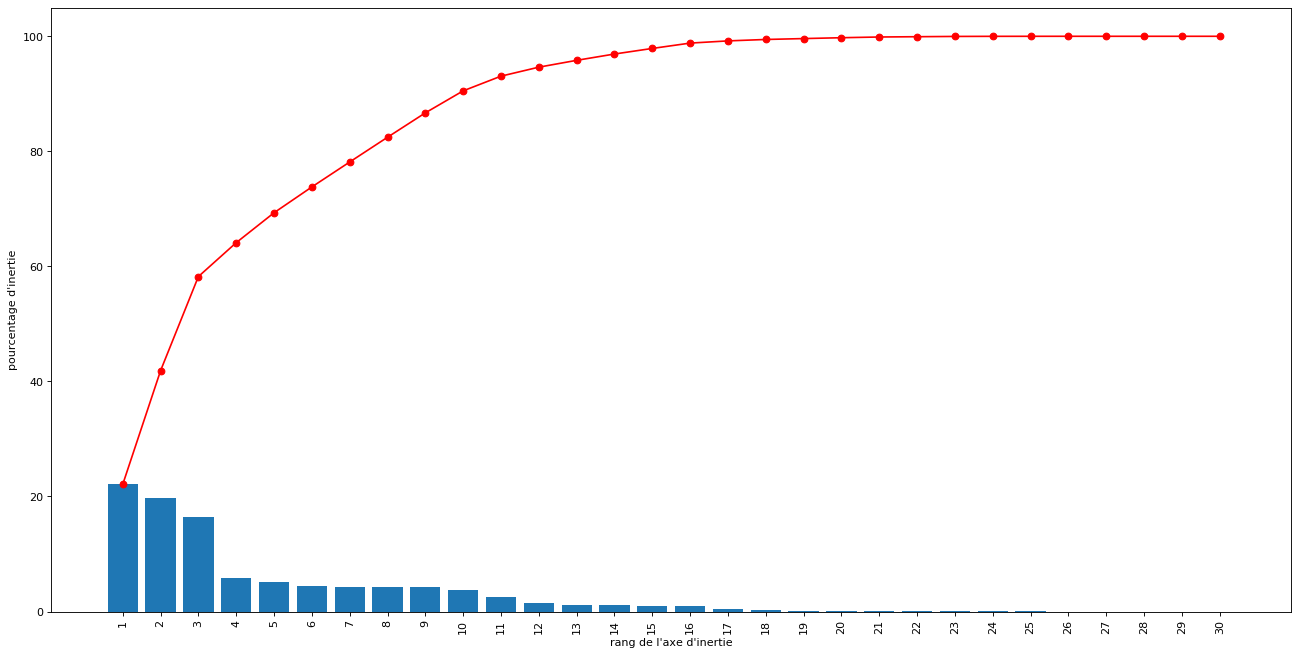

In [10]:
from sklearn import decomposition

# Calcul de l'ACP
acp = decomposition.PCA()
acp.fit(newX)

# Représentation des valeurs propres

vp = acp.explained_variance_ratio_*100

fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.bar(np.arange(len(vp))+1, vp)
plt.plot(np.arange(len(vp))+1, vp.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.xticks(np.arange(len(vp))+1)

ax.set_xticklabels(np.arange(len(vp))+1,rotation=90)

plt.show()

In [11]:
# Détermination du nombre de facteur à retenir (test des batons brisés)

## Détermination des valeurs propres
eigval = (newX.shape[0]-1)/newX.shape[0]*acp.explained_variance_

## Détermination des seuils
seuil = 1/np.arange(len(newX.columns),0,-1)
seuil = np.cumsum(seuil)
seuil[::-1]

testData= pd.DataFrame({'Eigen Values':eigval,'Thresold':seuil})

pd.options.display.max_rows = 130
testData

Eigen Values  Thresold
0   5.089105e+00  0.033333
1   4.555744e+00  0.067816
2   3.770936e+00  0.103530
3   1.357860e+00  0.140567
4   1.198317e+00  0.179029
5   1.034104e+00  0.219029
6   9.990759e-01  0.260696
7   9.915716e-01  0.304174
8   9.772537e-01  0.349628
9   8.814247e-01  0.397247
10  5.885042e-01  0.447247
11  3.602547e-01  0.499879
12  2.736778e-01  0.555435
13  2.529575e-01  0.614258
14  2.236041e-01  0.676758
15  2.136359e-01  0.743425
16  8.828375e-02  0.814853
17  5.703274e-02  0.891776
18  3.580968e-02  0.975110
19  3.449267e-02  1.066019
20  2.854509e-02  1.166019
21  1.192447e-02  1.277130
22  1.075837e-02  1.402130
23  4.154582e-03  1.544987
24  1.218018e-03  1.711654
25  5.167028e-04  1.911654
26  2.994934e-32  2.161654
27  2.994934e-32  2.494987
28  2.994934e-32  2.994987
29  2.994934e-32  3.994987

In [12]:
thrsld = 1+2*np.sqrt((len(newX.columns)-1)/(newX.shape[0]-1))
thrsld

1.0745856255459314

In [13]:
sum(vp[0:10])

90.51519986017573

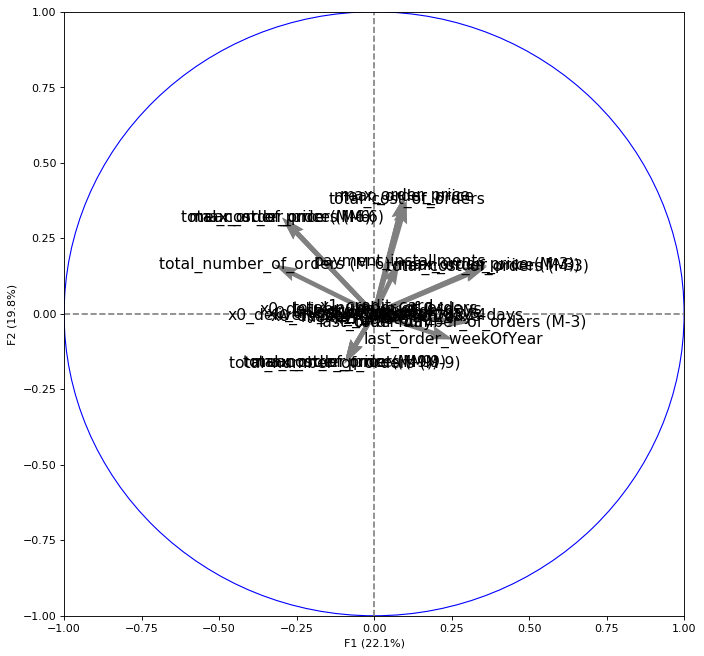

In [14]:
# Cercle de corrélation dans le premier plan factoriel (F1 et F2)

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

pcs = acp.components_

xmin, xmax, ymin, ymax = -1, 1, -1, 1

## Représentation des vecteurs
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[0,:], pcs[1,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

## Affichage des variables
labels = newX.columns
for i,(x, y) in enumerate(pcs[[0,1]].T):
    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', color="black")
                
## Affichage du cercle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

## Définition des limites du graphique
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
        
## Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

## Nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(vp[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(vp[1],1)))

plt.show()

In [15]:
pcs_new = pcs[:,(abs(pcs[0,:]) > 0.25) | (abs(pcs[1,:]) > 0.25)]
labels = newX.columns[(abs(pcs[0,:]) > 0.25) | (abs(pcs[1,:]) > 0.25)]
labels

Index(['last_order_weekOfYear', 'total_cost_of_orders', 'max_order_price',
       'mean_order_price', 'total_number_of_orders (M-3)',
       'total_cost_of_orders (M-3)', 'max_order_price (M-3)',
       'mean_order_price (M-3)', 'total_number_of_orders (M-6)',
       'total_cost_of_orders (M-6)', 'max_order_price (M-6)',
       'mean_order_price (M-6)'],
      dtype='object')

In [16]:
pcs_new.shape

(30, 12)

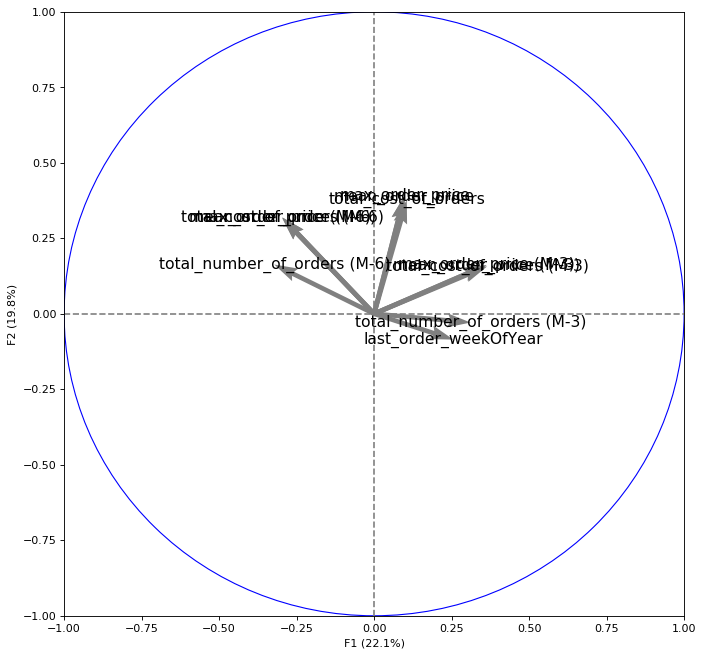

In [17]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

xmin, xmax, ymin, ymax = -1, 1, -1, 1

## Représentation des vecteurs
plt.quiver(np.zeros(pcs_new.shape[1]), np.zeros(pcs_new.shape[1]),
                   pcs_new[0,:], pcs_new[1,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

## Affichage des variables
for i,(x, y) in enumerate(pcs_new[[0,1]].T):
    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', color="black")
                
## Affichage du cercle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

## Définition des limites du graphique
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
        
## Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

## Nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(vp[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(vp[1],1)))

plt.show()

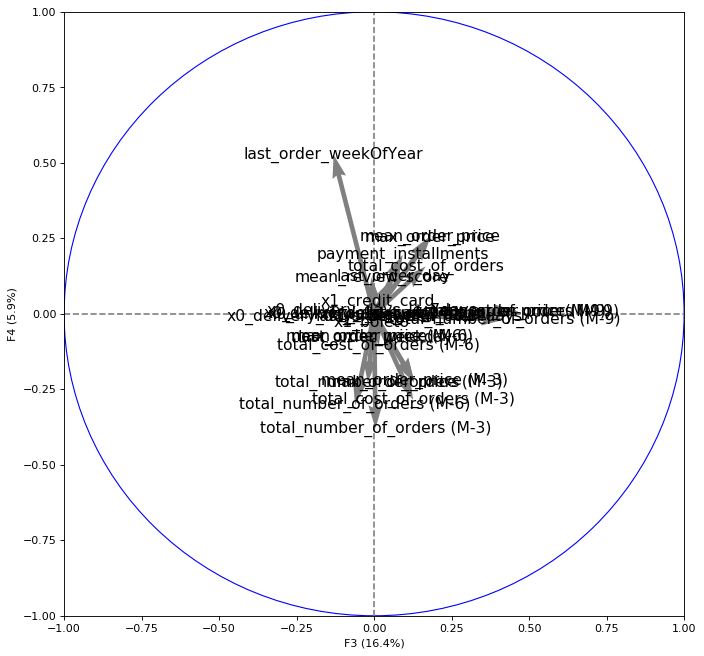

In [18]:
# Cercle de corrélation dans le deuxieme plan factoriel (F3 et F4)

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

pcs = acp.components_

xmin, xmax, ymin, ymax = -1, 1, -1, 1

## Représentation des vecteurs
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[2,:], pcs[3,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

## Affichage des variables
labels = newX.columns
for i,(x, y) in enumerate(pcs[[2,3]].T):
    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', color="black")
                
## Affichage du cercle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

## Définition des limites du graphique
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
        
## Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

## Nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(3, round(vp[2],1)))
plt.ylabel('F{} ({}%)'.format(4, round(vp[3],1)))

plt.show()

In [19]:
pcs_new = pcs[:,(abs(pcs[2,:]) > 0.25) | (abs(pcs[3,:]) > 0.25)]
labels = newX.columns[(abs(pcs[2,:]) > 0.25) | (abs(pcs[3,:]) > 0.25)]
labels

Index(['last_order_weekOfYear', 'max_order_price', 'mean_order_price',
       'total_number_of_orders (M-3)', 'total_cost_of_orders (M-3)',
       'total_number_of_orders (M-6)', 'total_number_of_orders (M-9)',
       'total_cost_of_orders (M-9)', 'max_order_price (M-9)',
       'mean_order_price (M-9)'],
      dtype='object')

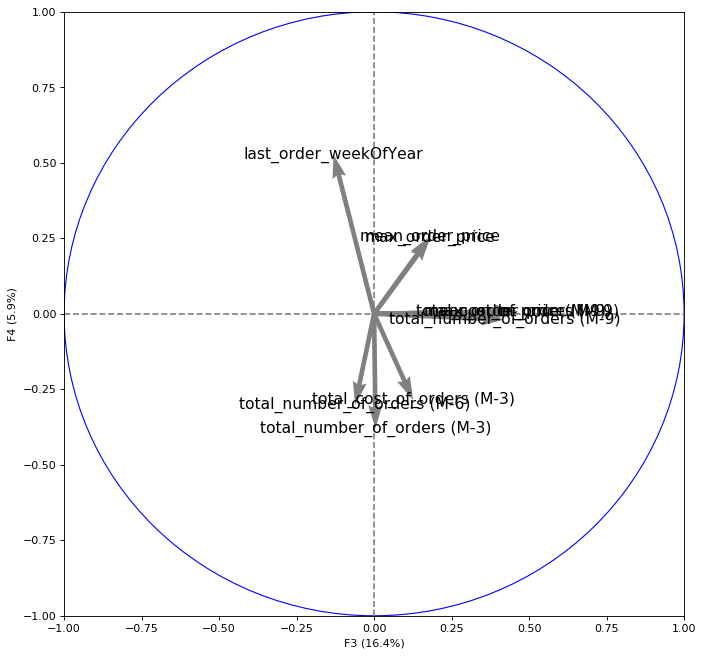

In [20]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

xmin, xmax, ymin, ymax = -1, 1, -1, 1

## Représentation des vecteurs
plt.quiver(np.zeros(pcs_new.shape[1]), np.zeros(pcs_new.shape[1]),
                   pcs_new[2,:], pcs_new[3,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

## Affichage des variables
for i,(x, y) in enumerate(pcs_new[[2,3]].T):
    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', color="black")
                
## Affichage du cercle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

## Définition des limites du graphique
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
        
## Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

## Nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(3, round(vp[2],1)))
plt.ylabel('F{} ({}%)'.format(4, round(vp[3],1)))

plt.show()

In [21]:
PCs = ['PC'+str(i+1) for i in range(newX.shape[1])]
PCs

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30']

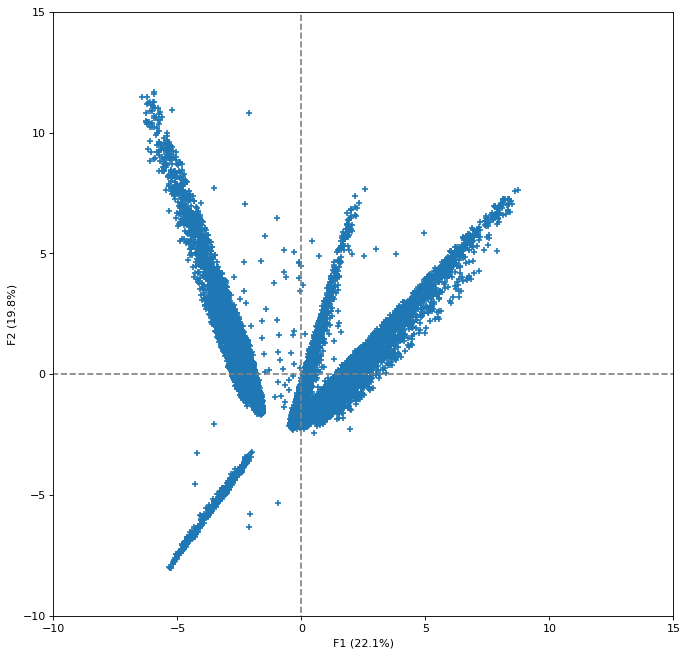

In [22]:
# Représentation des individus dans le premier plan factoriel (F1 et F2)

PCs = ['PC'+str(i+1) for i in range(newX.shape[1])]

projectedValues = acp.transform(newX)

projectedValuesDF = pd.DataFrame(projectedValues,columns=PCs)
projectedValuesDF.index = newX.index

colors = ['darkgreen','lightgreen','yellow','orange','red']

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

    
plt.scatter(projectedValues[:,0],projectedValues[:,1],marker='+')

plt.xlim([-10,15])
plt.ylim([-10,15])
        
# affichage des lignes horizontales et verticales
plt.plot([-100, 100], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-100, 100], color='grey', ls='--')

## nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(vp[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(vp[1],1)))

plt.show()
#projectedValuesDF.head()

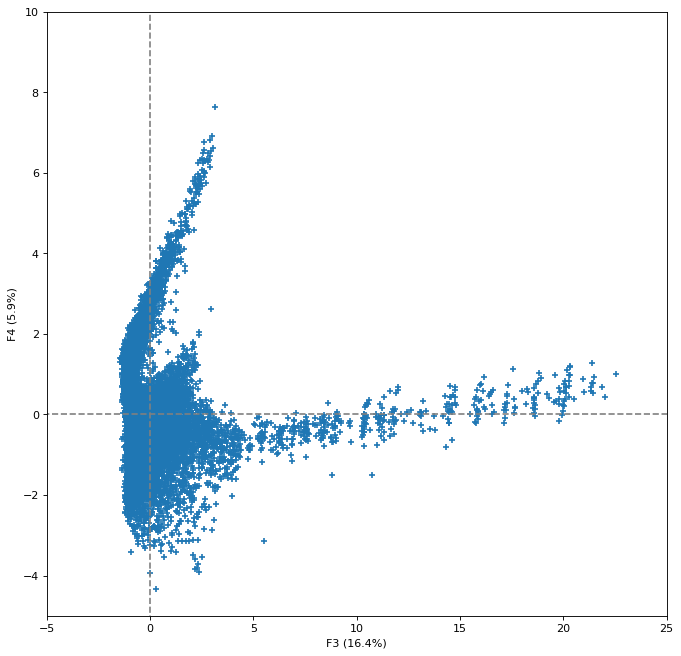

In [23]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

    
plt.scatter(projectedValues[:,2],projectedValues[:,3],marker='+')

plt.xlim([-5,25])
plt.ylim([-5,10])
        
# affichage des lignes horizontales et verticales
plt.plot([-100, 100], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-100, 100], color='grey', ls='--')

## nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(3, round(vp[2],1)))
plt.ylabel('F{} ({}%)'.format(4, round(vp[3],1)))

plt.show()

## Algorithme T-SNE

In [24]:
X_new = projectedValuesDF.iloc[:,:10]
X_new.head()

PC1       PC2       PC3       PC4  \
customer_unique_id                                                         
b4527423469300ee354458e1b5f961be  1.407330 -0.089155  0.024446 -1.188380   
af0f26435fade1ca984d9affda307199  0.173615 -0.794485 -0.559480  1.638135   
f421a2a66b69dbfe6db0c87845281a90  0.031939 -0.893739 -0.608618  2.082465   
00ac9cd5c4ad19e16e7c6f6864711737 -3.331530  4.264151  0.541529  0.880875   
51dc56123336c573f2977f5da81b17b9 -3.477438  3.936789  0.353466  0.551317   

                                       PC5       PC6       PC7       PC8  \
customer_unique_id                                                         
b4527423469300ee354458e1b5f961be -0.359510  2.082257 -0.340917  1.605376   
af0f26435fade1ca984d9affda307199  2.577684 -0.253234  0.001637  0.126646   
f421a2a66b69dbfe6db0c87845281a90  0.124185 -0.713737 -1.402842 -0.365464   
00ac9cd5c4ad19e16e7c6f6864711737  0.106204 -0.373038  0.484506 -1.440227   
51dc56123336c573f2977f5da81b17b9  0.056880 -1.592675  0.606064 -0.580303   

                                       PC9      PC10  
customer_unique_id                                    
b4527423469300ee354458e1b5f961be -0.708252  0.705021  
af0f26435fade1ca984d9affda307199 -1.204504 -0.343699  
f421a2a66b69dbfe6db0c87845281a90  0.641144  0.072459  
00ac9cd5c4ad19e16e7c6f6864711737 -0.899291 -1.258369  
51dc56123336c573f2977f5da81b17b9 -1.012133  0.018319

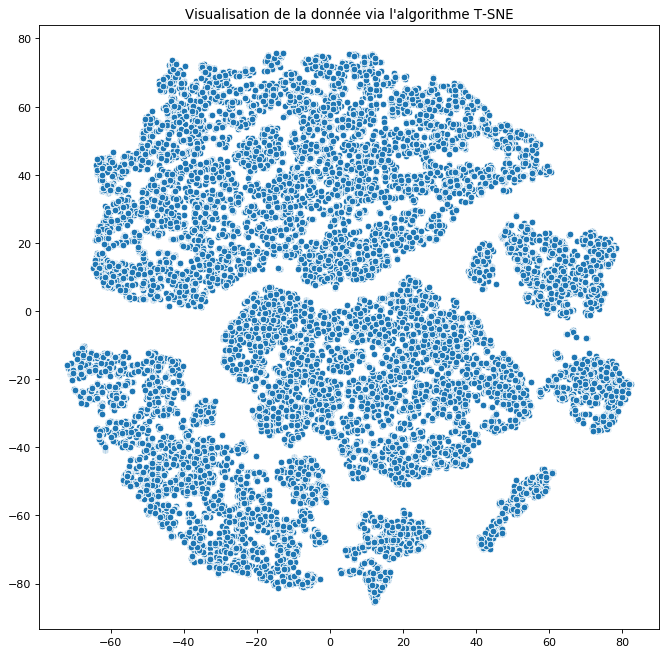

In [25]:
X_embedded = TSNE(n_components=2).fit_transform(X_new)

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation de la donnée via l'algorithme T-SNE")
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1])

In [26]:
X_embedded.shape

(20853, 2)

## Application de l'algorithme KMeans

In [27]:
models = {}
variance = {}
silhouetteScore = {}
daviesBouldin_score = {}

for k in range(2,10):
    km = KMeans(n_clusters=k,random_state=0,n_jobs=-1).fit(X_new)
    
    models[k] = km
    variance[k] = km.inertia_
    silhouetteScore[k] = metrics.silhouette_score(X_new,km.labels_)
    daviesBouldin_score[k] = metrics.davies_bouldin_score(X_new,km.labels_)

### Représentation de l'inertie intra-classe en fonction du nombre de cluster

In [28]:
variance

{2: 358027.42757804197,
 3: 286853.65208339936,
 4: 235284.78949528805,
 5: 206767.1557361878,
 6: 190392.42196520706,
 7: 179794.61025276067,
 8: 169100.83093432215,
 9: 160798.2523930532}

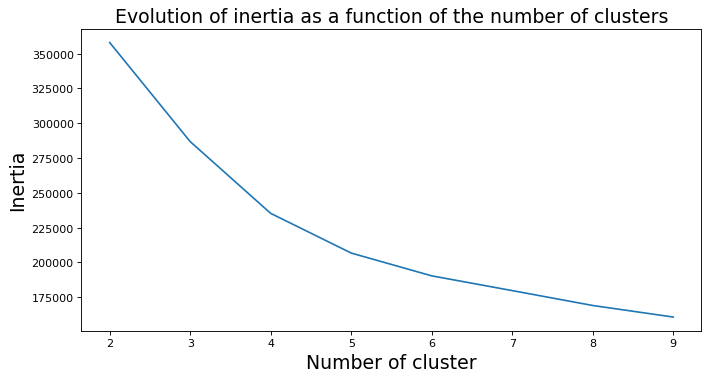

In [29]:
fig,ax = plt.subplots(figsize=(10,5), dpi= 80, facecolor='w', edgecolor='k')


plt.title('Evolution of inertia as a function of the number of clusters',fontsize=17)
plt.plot(list(variance.keys()),list(variance.values()))

#plt.xlim([-50,50])
#plt.ylim([-50,50])
plt.xlabel('Number of cluster',fontsize=17)
plt.ylabel('Inertia',fontsize=17)

plt.show()

### Représentation du coefficient de silhouette en fonction du nombre de cluster

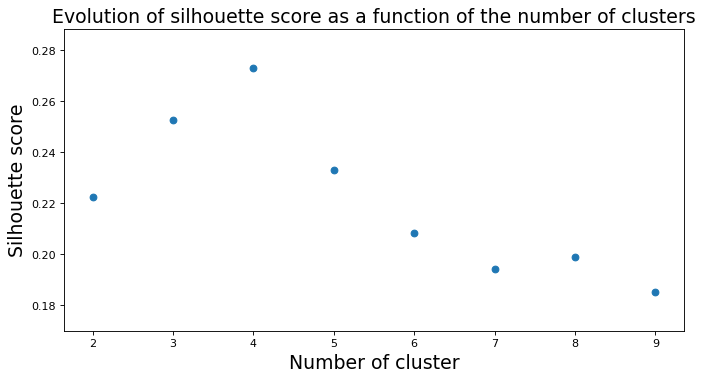

In [30]:
fig,ax = plt.subplots(figsize=(10,5), dpi= 80, facecolor='w', edgecolor='k')


plt.title('Evolution of silhouette score as a function of the number of clusters',fontsize=17)
plt.scatter(list(silhouetteScore.keys()),list(silhouetteScore.values()))

#plt.xlim([-50,50])
#plt.ylim([-50,50])
plt.xlabel('Number of cluster',fontsize=17)
plt.ylabel('Silhouette score',fontsize=17)

plt.show()

### Représentation de l'indice de Davies Bouldin en fonction du nombre de cluster

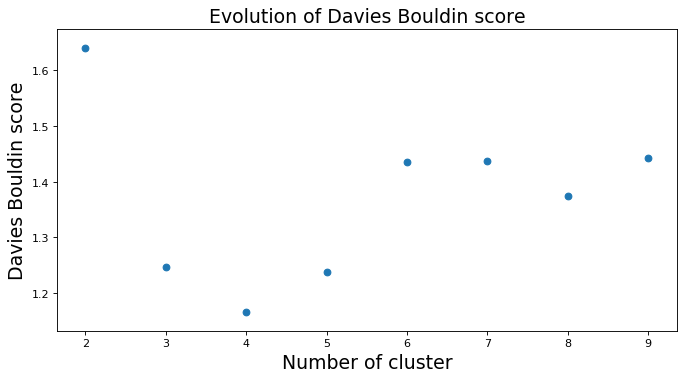

In [31]:
fig,ax = plt.subplots(figsize=(10,5), dpi= 80, facecolor='w', edgecolor='k')


plt.title('Evolution of Davies Bouldin score',fontsize=17)
plt.scatter(list(daviesBouldin_score.keys()),list(daviesBouldin_score.values()))

#plt.xlim([-50,50])
#plt.ylim([-50,50])
plt.xlabel('Number of cluster',fontsize=17)
plt.ylabel('Davies Bouldin score',fontsize=17)

plt.show()

In [32]:
nbClusters = 4

### Représentation dans le premier plan factoriel

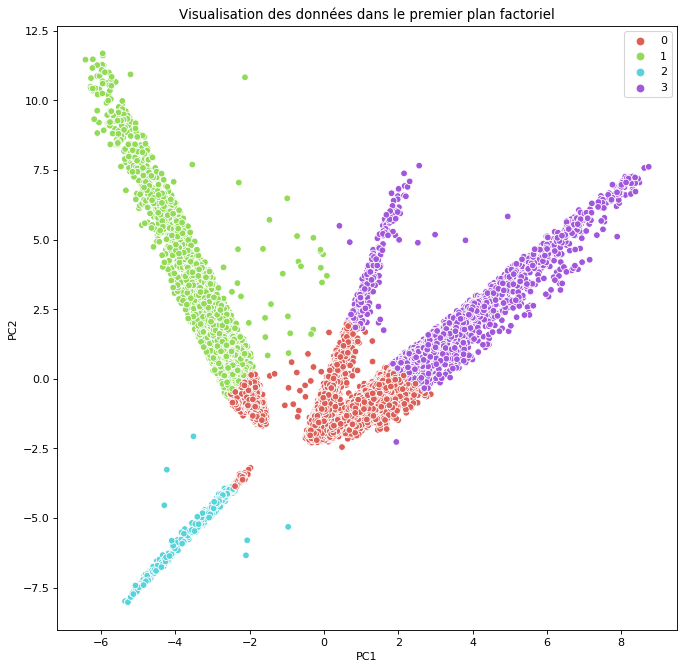

In [33]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation des données dans le premier plan factoriel")
g = sns.scatterplot(X_new.iloc[:,0], X_new.iloc[:,1],
                    hue=models[nbClusters].labels_,
                    legend='full',palette=sns.color_palette("hls",nbClusters))
plt.show()

### Représentation des données via T-SNE

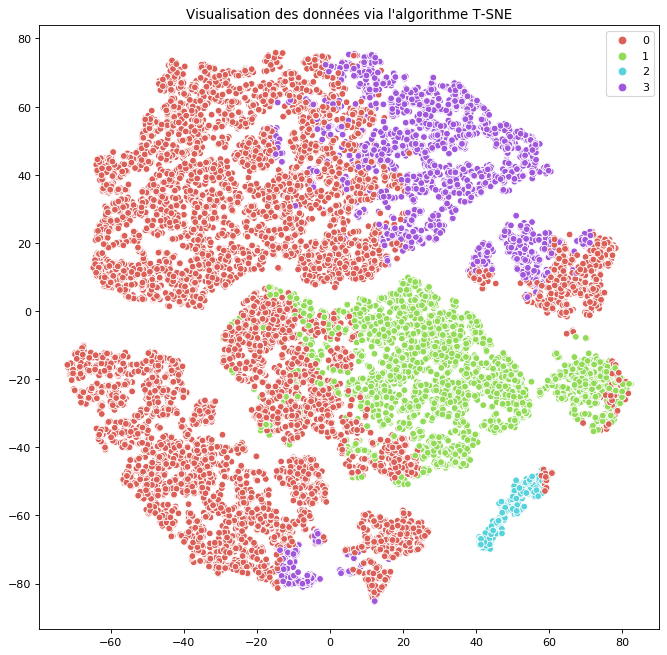

In [34]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation des données via l'algorithme T-SNE")
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1],
                    hue=models[nbClusters].labels_,
                    legend='full',palette=sns.color_palette("hls",nbClusters))
plt.show()

## Clustering Hierarchique

In [35]:
cah = AgglomerativeClustering(n_clusters=nbClusters).fit(X_new)

In [36]:
cah.labels_

array([1, 1, 1, ..., 0, 1, 0])

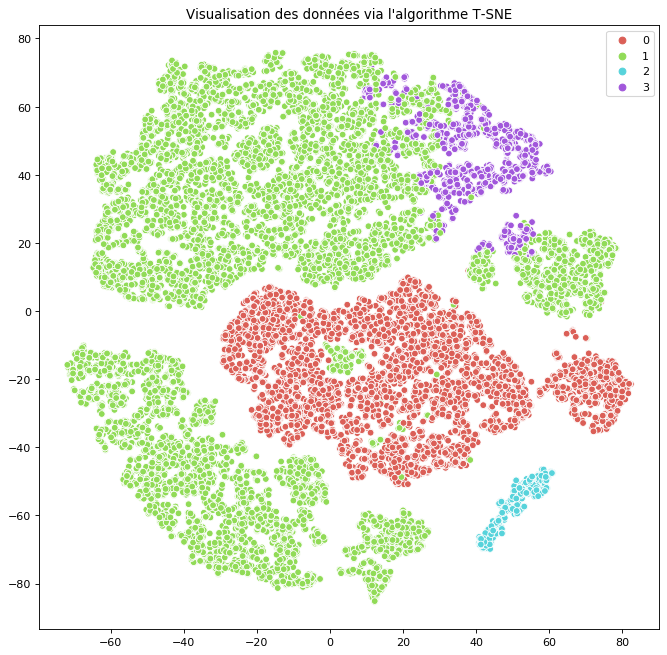

In [37]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation des données via l'algorithme T-SNE")
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1],
                    hue=cah.labels_,
                    legend='full',palette=sns.color_palette("hls",nbClusters))

plt.show()

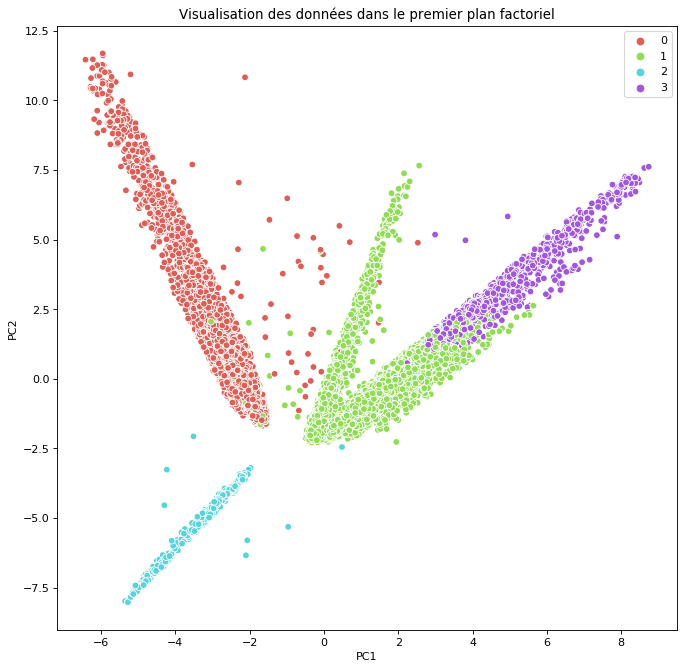

In [38]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation des données dans le premier plan factoriel")
g = sns.scatterplot(X_new.iloc[:,0], X_new.iloc[:,1],
                    hue=cah.labels_,
                    legend='full',palette=sns.color_palette("hls",nbClusters))
plt.show()

In [39]:
km_silhouette_score = metrics.silhouette_score(X_new,models[nbClusters].labels_)
cah_silhouette_score = metrics.silhouette_score(X_new,cah.labels_)

print('KMeans :',km_silhouette_score)
print('CAH :',cah_silhouette_score)

KMeans : 0.27303177064436845
CAH : 0.2508406133003817


L'algorithme du KMeans donne le coefficient de silhouette le plus élevé donc va être retenu pour la suite de l'analyse.

In [40]:
newData = data.copy()
newData['labels'] = models[nbClusters].labels_
#newData.set_index('labels',inplace=True)
newData.head()

customer_city customer_state  \
customer_unique_id                                                
b4527423469300ee354458e1b5f961be        contagem             MG   
af0f26435fade1ca984d9affda307199            maua             SP   
f421a2a66b69dbfe6db0c87845281a90       sao paulo             SP   
00ac9cd5c4ad19e16e7c6f6864711737         itajuba             MG   
51dc56123336c573f2977f5da81b17b9  rio de janeiro             RJ   

                                          last_order  last_order_day  \
customer_unique_id                                                     
b4527423469300ee354458e1b5f961be 2017-05-05 16:12:29               5   
af0f26435fade1ca984d9affda307199 2017-08-30 11:47:52              30   
f421a2a66b69dbfe6db0c87845281a90 2017-08-21 20:35:44              21   
00ac9cd5c4ad19e16e7c6f6864711737 2017-04-28 14:20:07              28   
51dc56123336c573f2977f5da81b17b9 2017-04-27 09:09:44              27   

                                  last_order_hour  last_order_weekday  \
customer_unique_id                                                      
b4527423469300ee354458e1b5f961be               16                   5   
af0f26435fade1ca984d9affda307199               11                   3   
f421a2a66b69dbfe6db0c87845281a90               20                   1   
00ac9cd5c4ad19e16e7c6f6864711737               14                   5   
51dc56123336c573f2977f5da81b17b9                9                   4   

                                  last_order_weekOfYear  \
customer_unique_id                                        
b4527423469300ee354458e1b5f961be                     18   
af0f26435fade1ca984d9affda307199                     35   
f421a2a66b69dbfe6db0c87845281a90                     34   
00ac9cd5c4ad19e16e7c6f6864711737                     17   
51dc56123336c573f2977f5da81b17b9                     17   

                                  total_number_of_orders  \
customer_unique_id                                         
b4527423469300ee354458e1b5f961be                       1   
af0f26435fade1ca984d9affda307199                       2   
f421a2a66b69dbfe6db0c87845281a90                       1   
00ac9cd5c4ad19e16e7c6f6864711737                       1   
51dc56123336c573f2977f5da81b17b9                       1   

                                 most_purchased_product  mean_review_score  \
customer_unique_id                                                           
b4527423469300ee354458e1b5f961be         sports_leisure                1.0   
af0f26435fade1ca984d9affda307199       office_furniture                3.0   
f421a2a66b69dbfe6db0c87845281a90         sports_leisure                5.0   
00ac9cd5c4ad19e16e7c6f6864711737    luggage_accessories                5.0   
51dc56123336c573f2977f5da81b17b9    luggage_accessories                5.0   

                                  ...  max_order_price (M-6)  \
customer_unique_id                ...                          
b4527423469300ee354458e1b5f961be  ...                    0.0   
af0f26435fade1ca984d9affda307199  ...                    0.0   
f421a2a66b69dbfe6db0c87845281a90  ...                    0.0   
00ac9cd5c4ad19e16e7c6f6864711737  ...                  209.9   
51dc56123336c573f2977f5da81b17b9  ...                  209.9   

                                  mean_order_price (M-6)  \
customer_unique_id                                         
b4527423469300ee354458e1b5f961be                     0.0   
af0f26435fade1ca984d9affda307199                     0.0   
f421a2a66b69dbfe6db0c87845281a90                     0.0   
00ac9cd5c4ad19e16e7c6f6864711737                   209.9   
51dc56123336c573f2977f5da81b17b9                   209.9   

                                  total_number_of_orders (M-9)  \
customer_unique_id                                               
b4527423469300ee354458e1b5f961be                           0.0   
af0f26435fade1ca984d9affda307199                           0.0   
f421a2a66b69dbfe6db0c87845281a90

In [41]:
newData.dtypes

customer_city                           object
customer_state                          object
last_order                      datetime64[ns]
last_order_day                           int64
last_order_hour                          int64
last_order_weekday                       int64
last_order_weekOfYear                    int64
total_number_of_orders                   int64
most_purchased_product                  object
mean_review_score                      float64
total_cost_of_orders                   float64
max_order_price                        float64
mean_order_price                       float64
total_number_of_orders (M-3)           float64
total_cost_of_orders (M-3)             float64
max_order_price (M-3)                  float64
mean_order_price (M-3)                 float64
total_number_of_orders (M-6)           float64
total_cost_of_orders (M-6)             float64
max_order_price (M-6)                  float64
mean_order_price (M-6)                 float64
total_number_

In [42]:
sampleSize = newData[['max_order_price','labels']].groupby('labels').count()
sampleSize

max_order_price
labels                 
0                 13427
1                  3797
2                   385
3                  3244

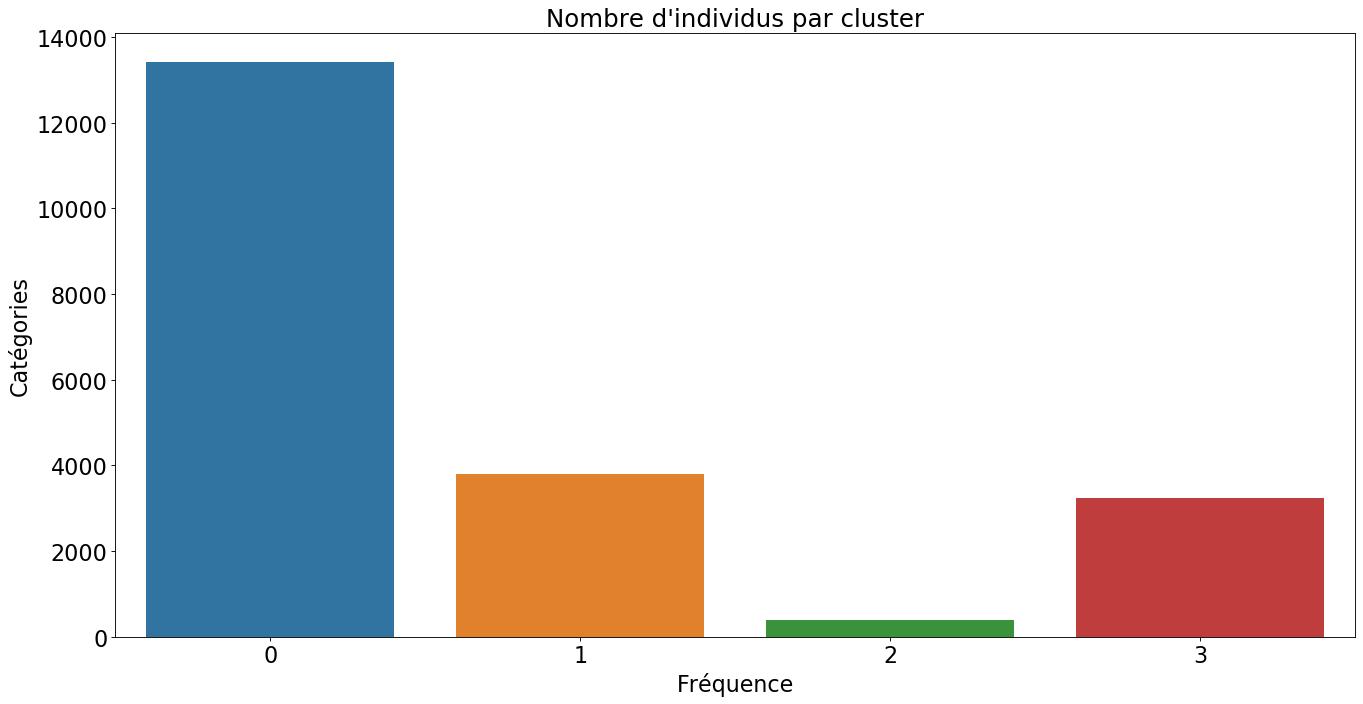

In [43]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

sampleSize = newData[['max_order_price','labels']].groupby('labels').count()

g = sns.barplot(x=sampleSize.index, y=sampleSize['max_order_price'],ax=ax)

plt.title("Nombre d'individus par cluster",fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Catégories",fontsize=20)
plt.xlabel("Fréquence",fontsize=20)

plt.show()

mean_review_score


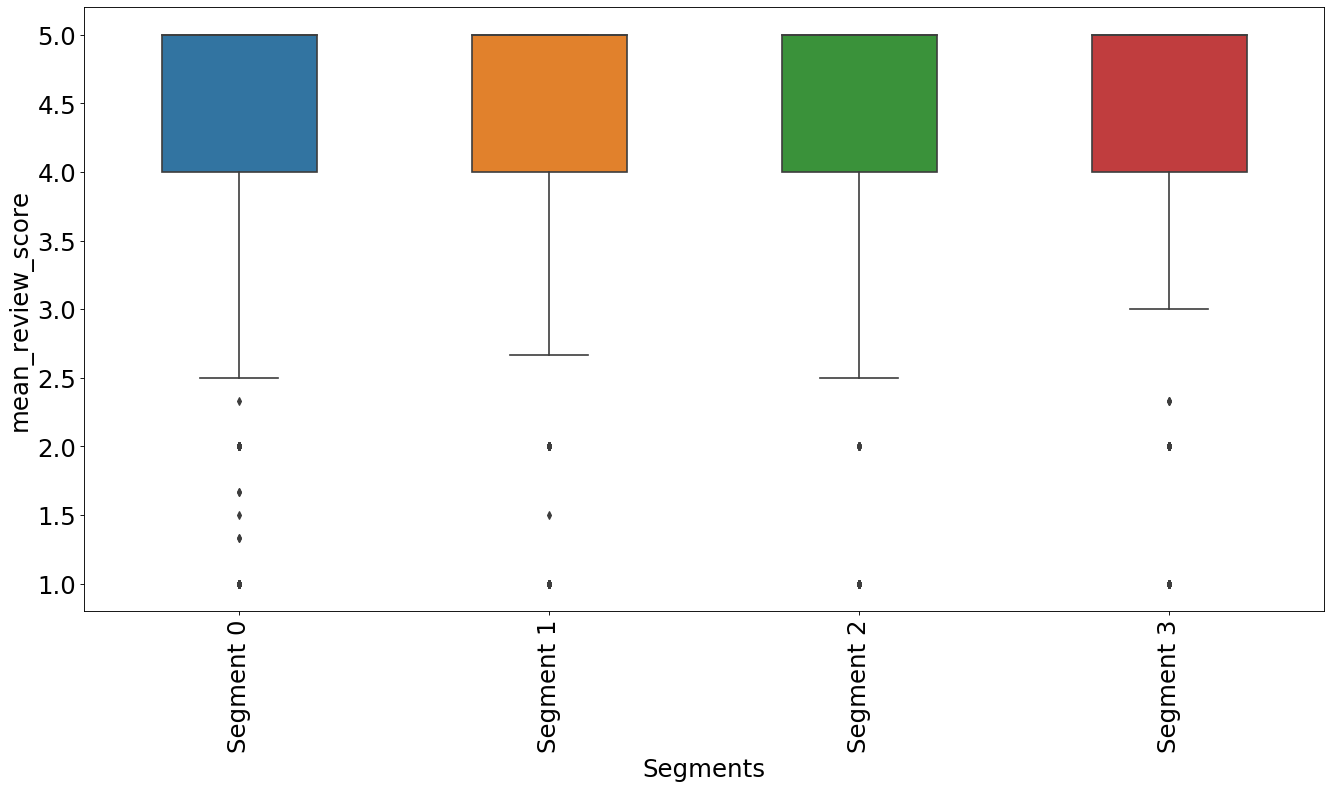

total_cost_of_orders


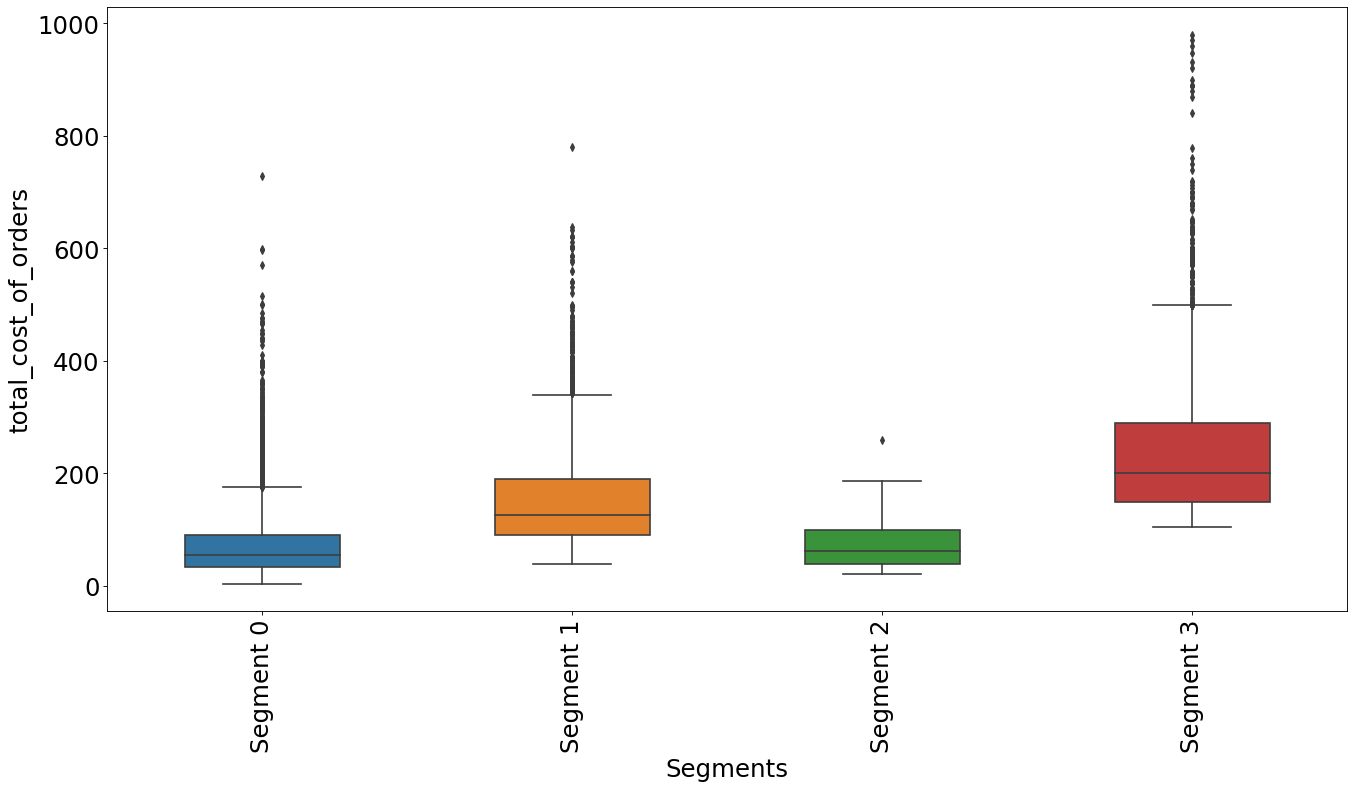

max_order_price


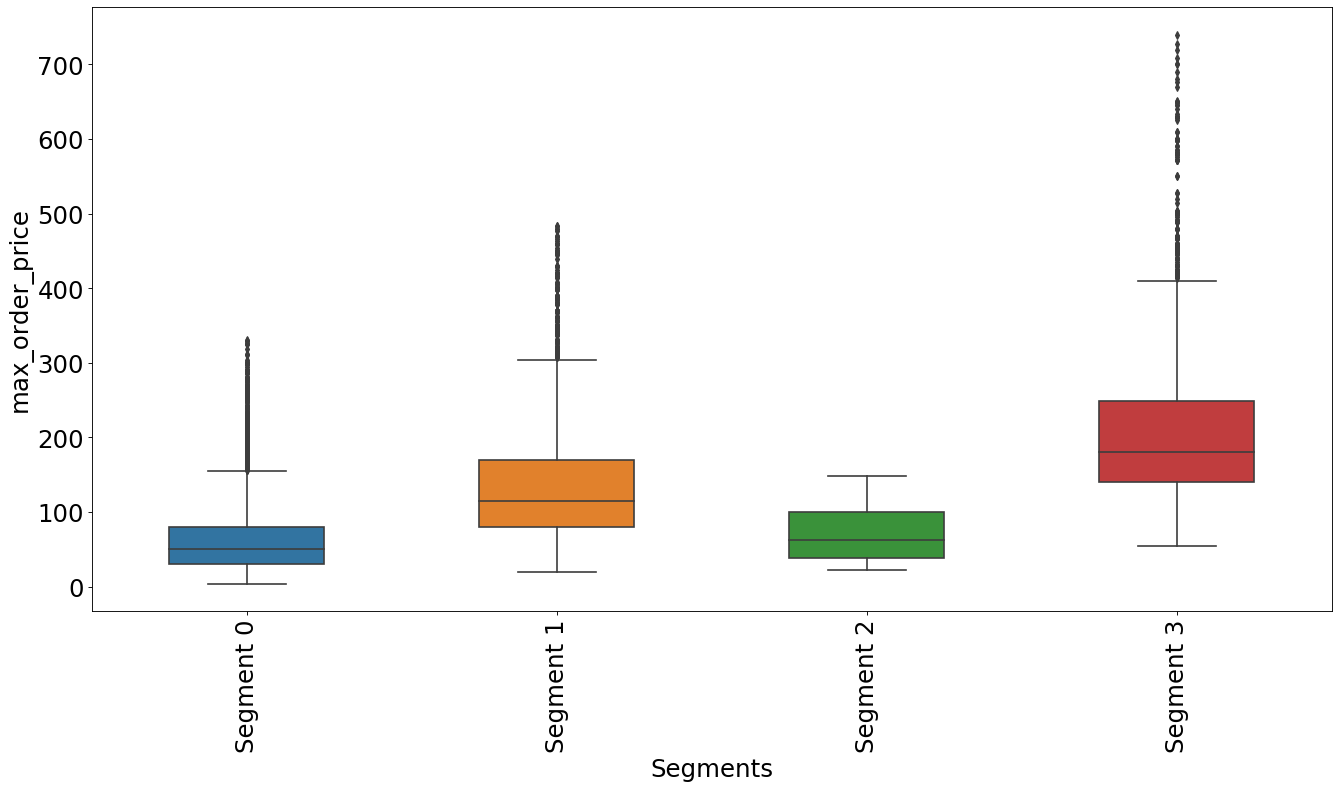

mean_order_price


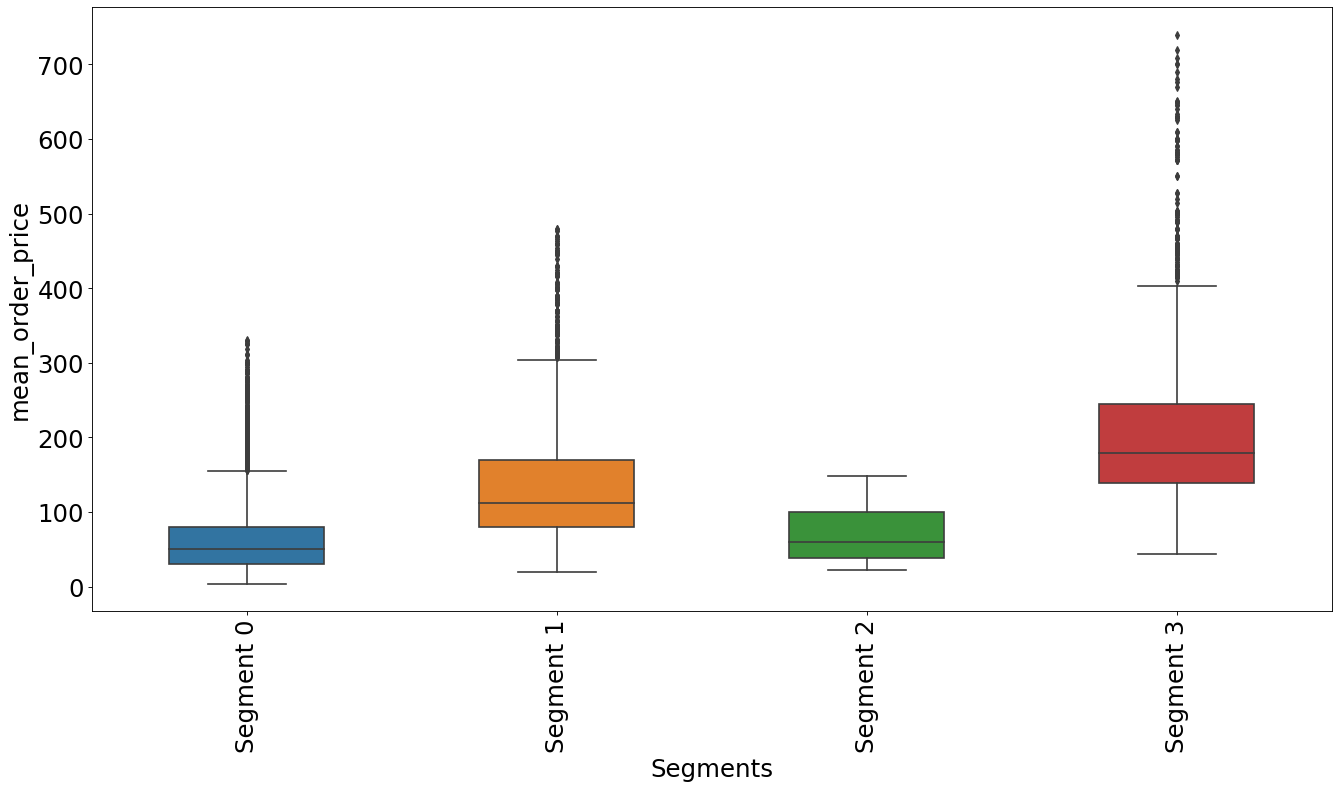

total_number_of_orders (M-3)


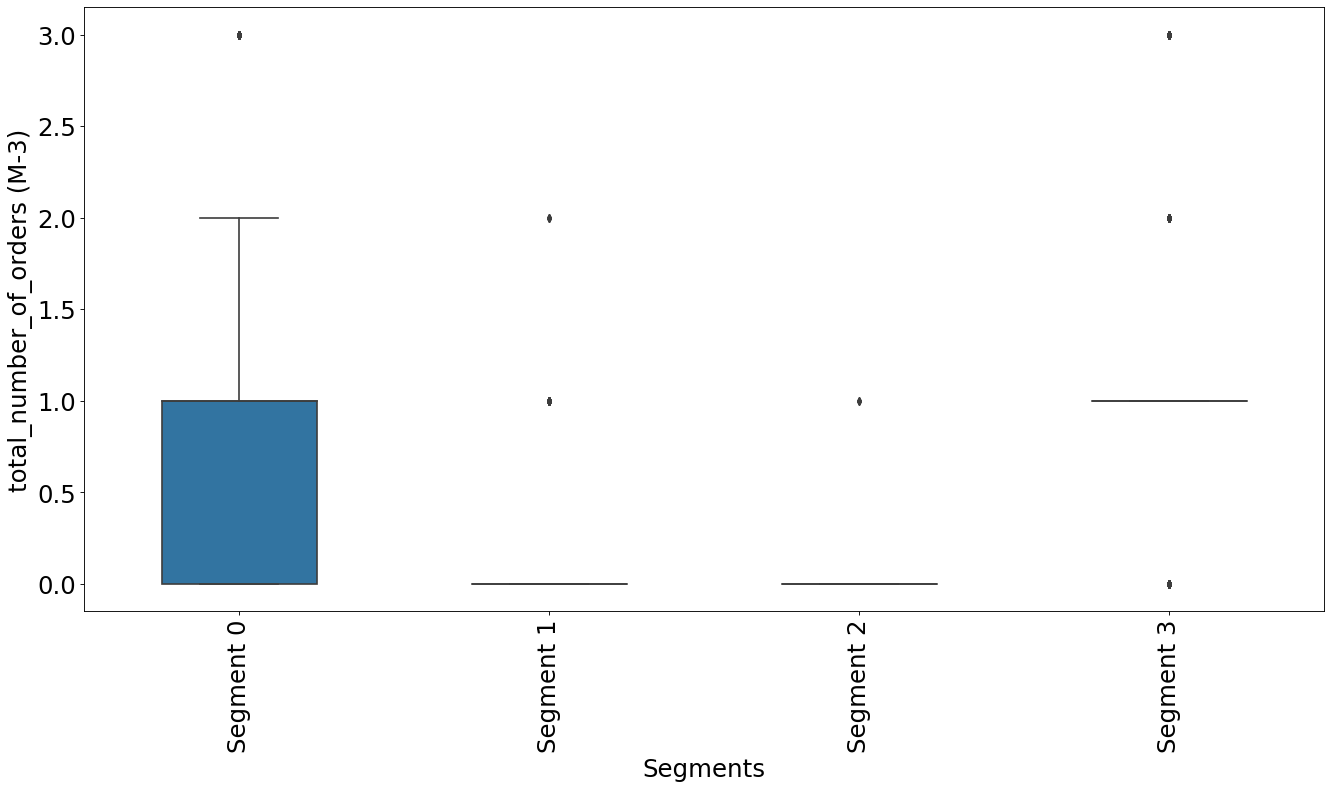

total_cost_of_orders (M-3)


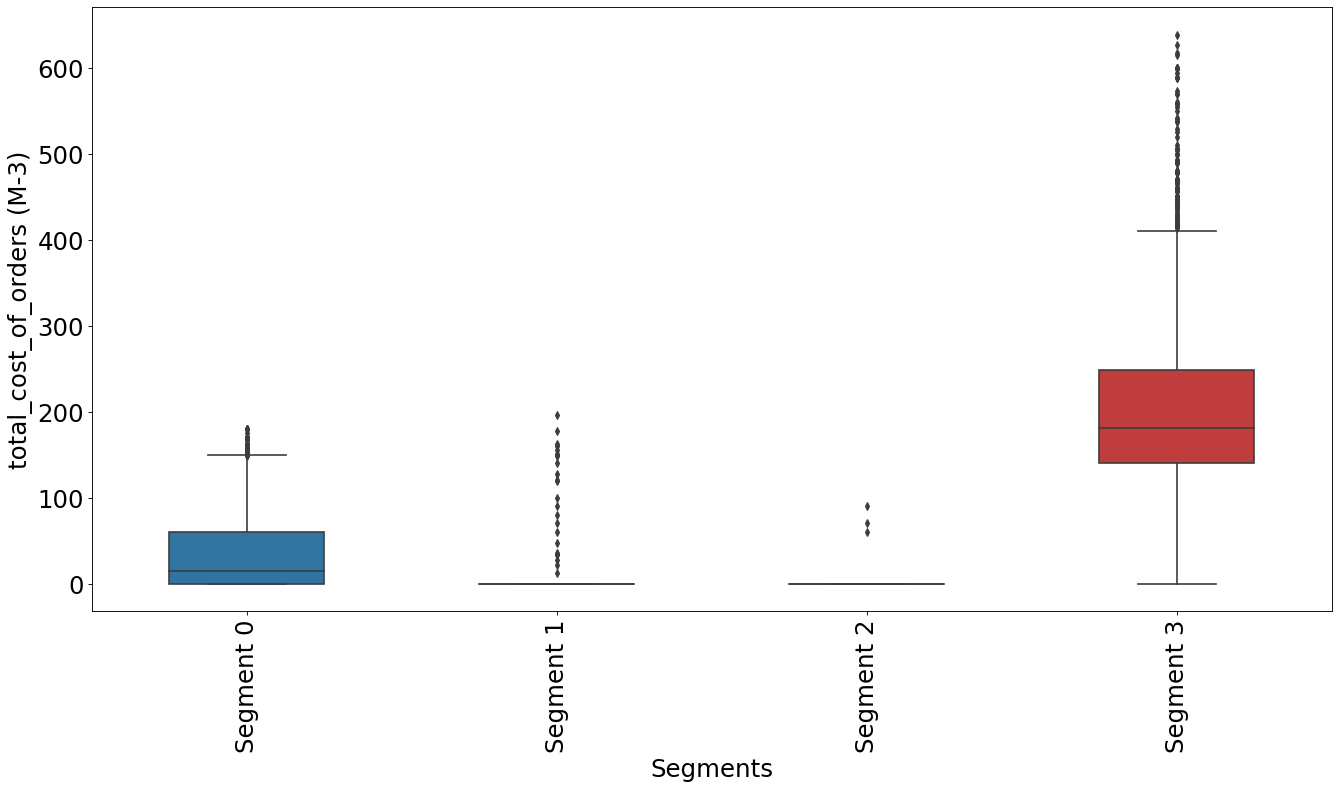

max_order_price (M-3)


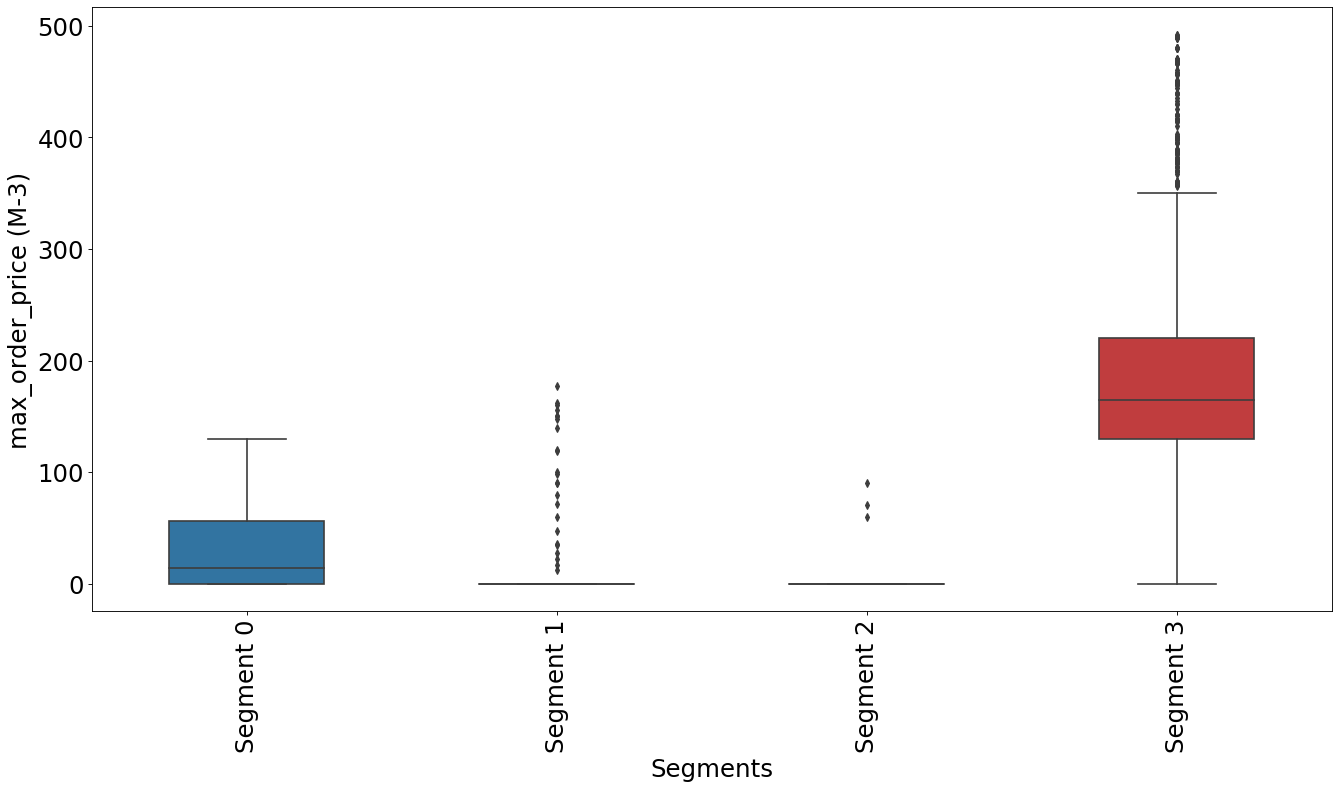

mean_order_price (M-3)


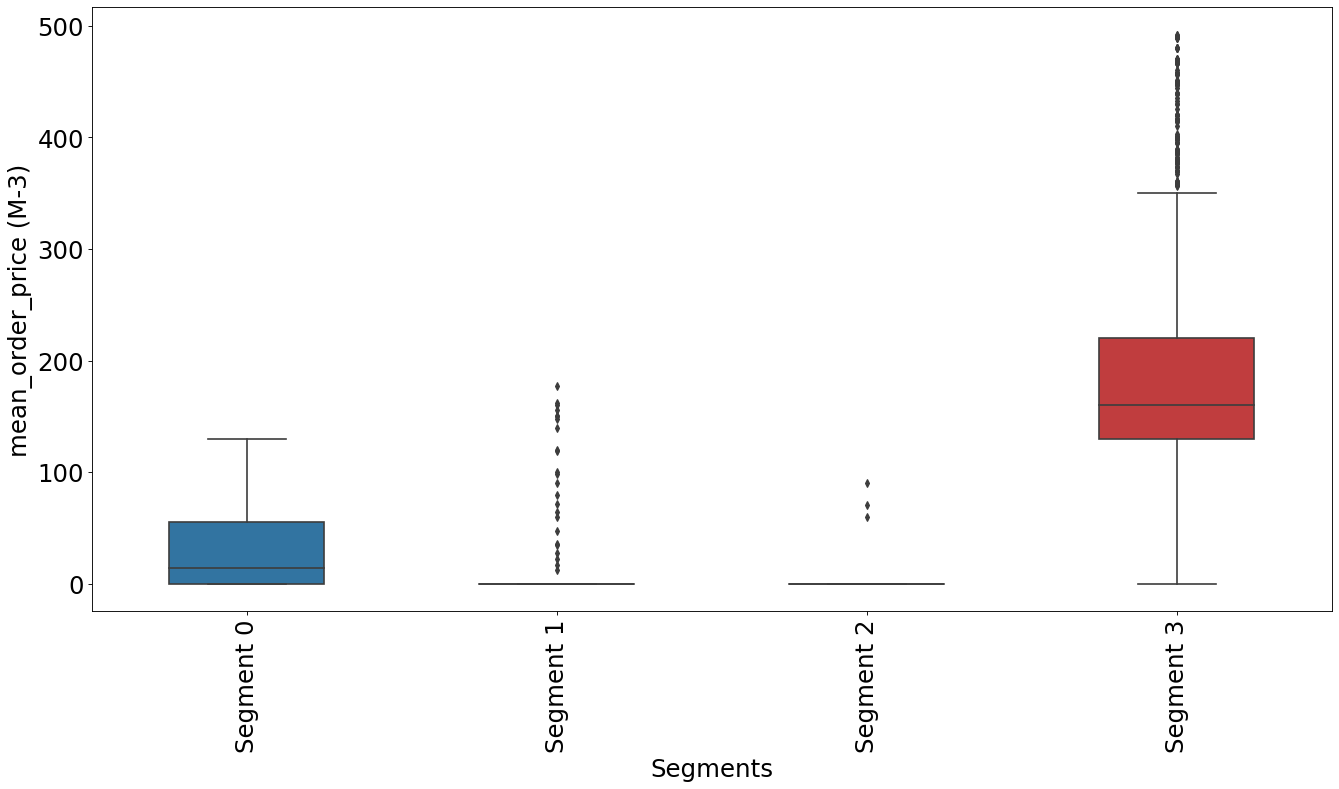

total_number_of_orders (M-6)


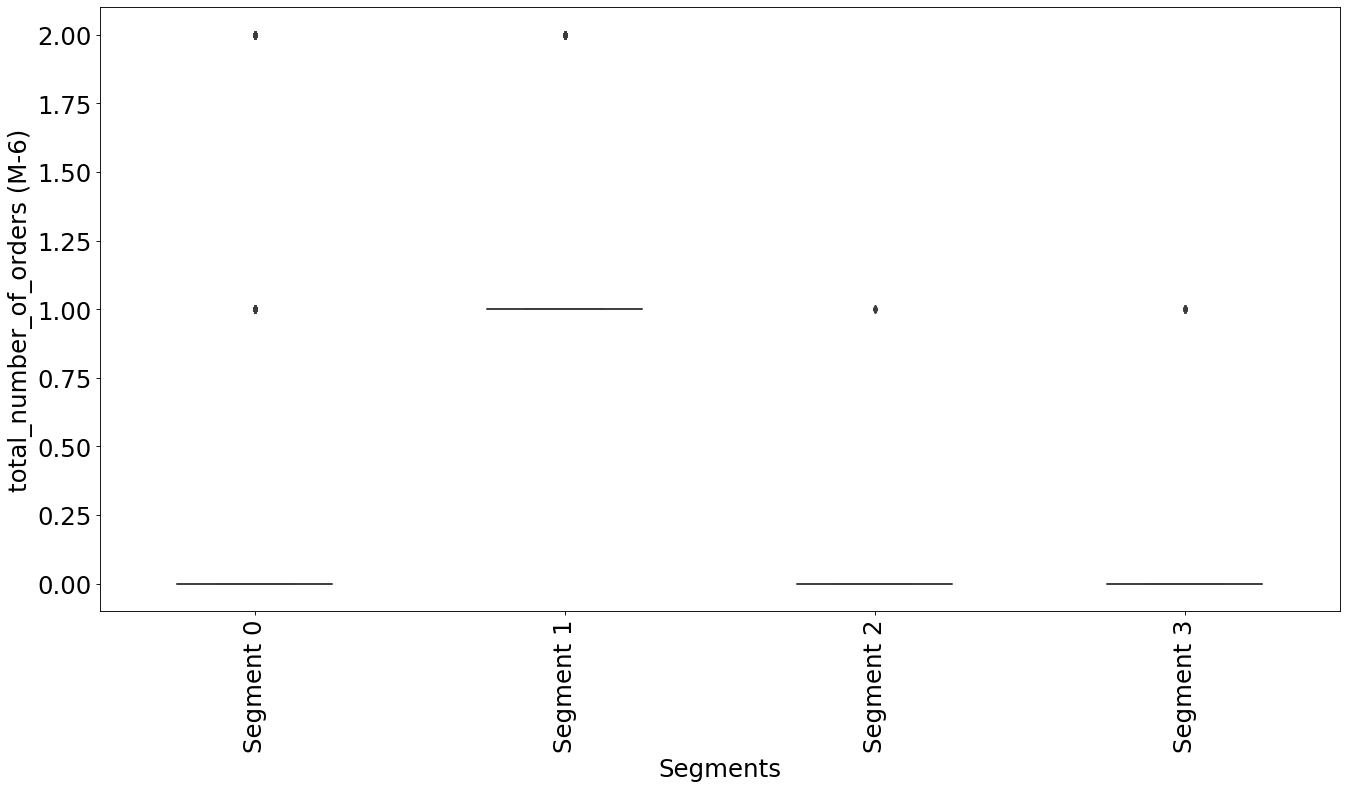

total_cost_of_orders (M-6)


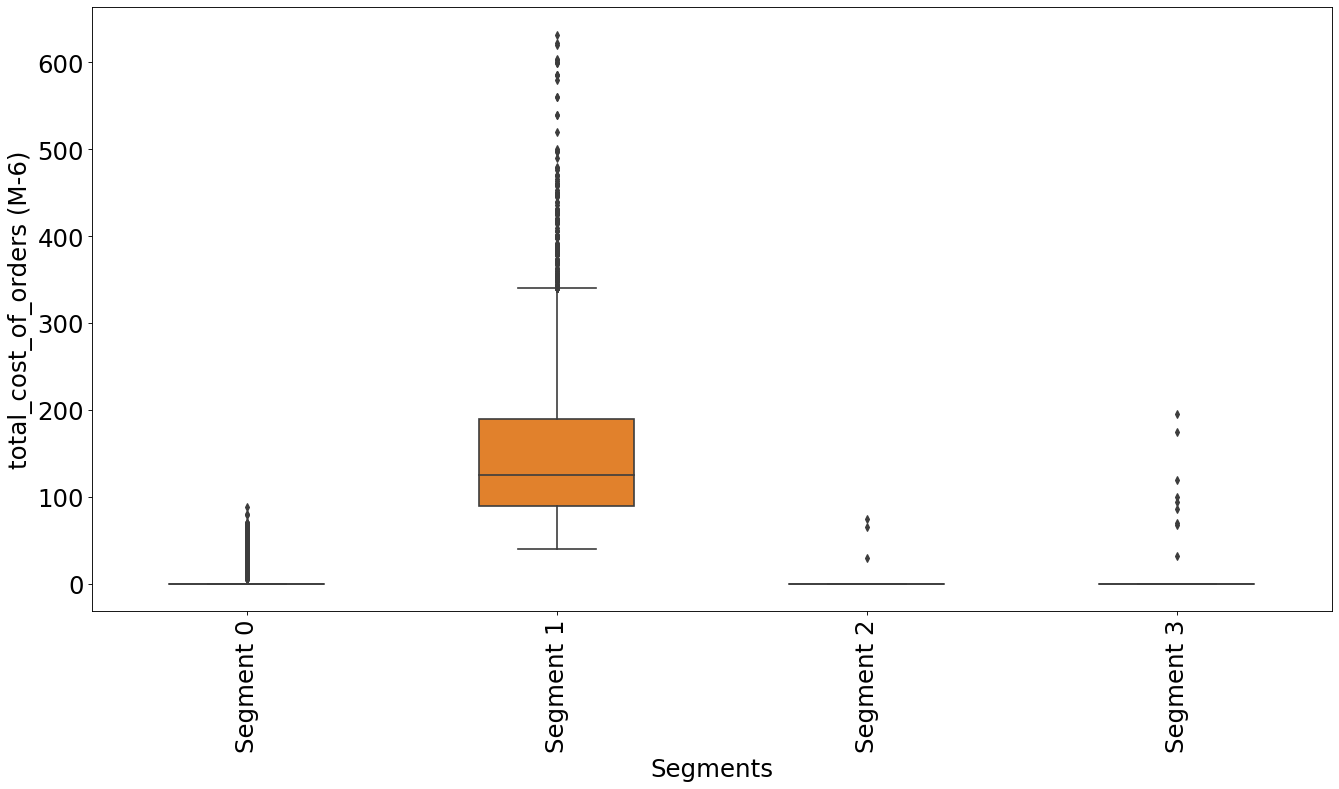

max_order_price (M-6)


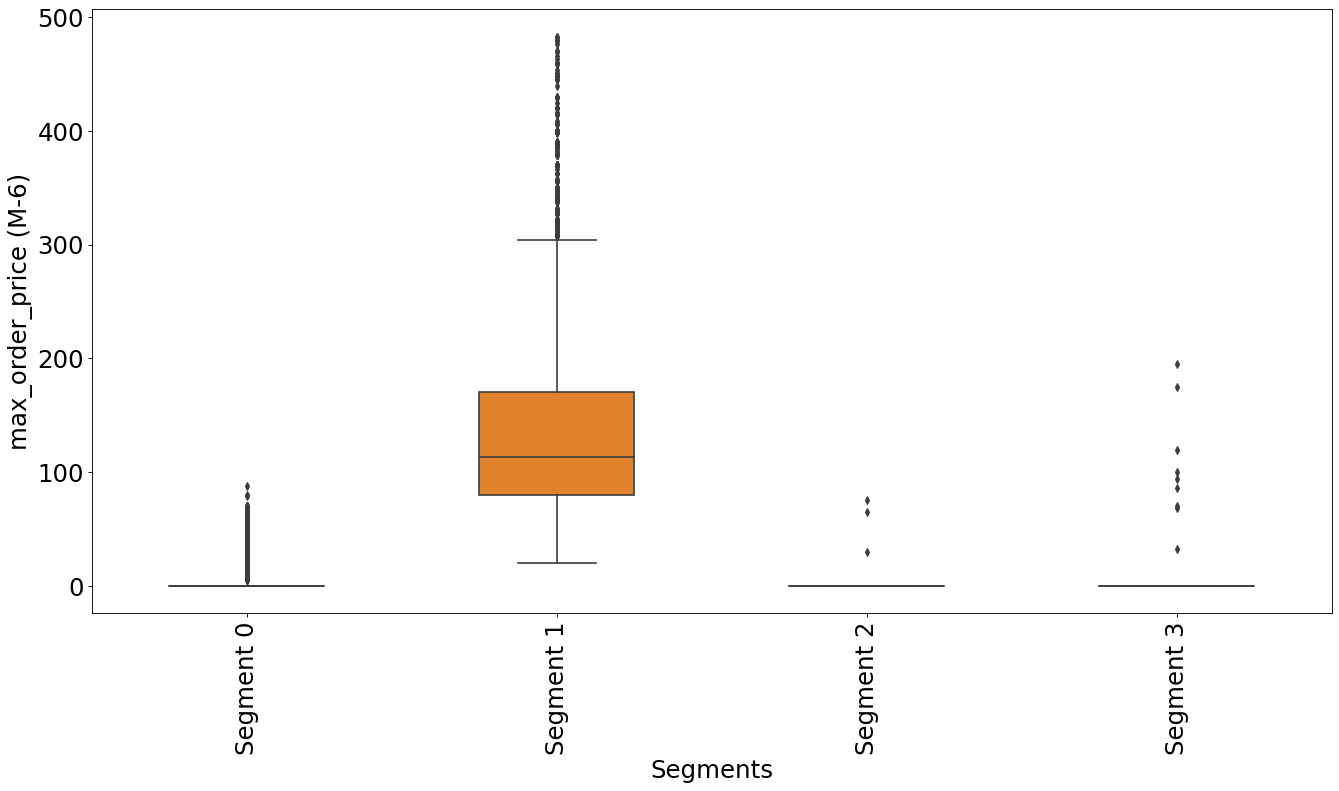

mean_order_price (M-6)


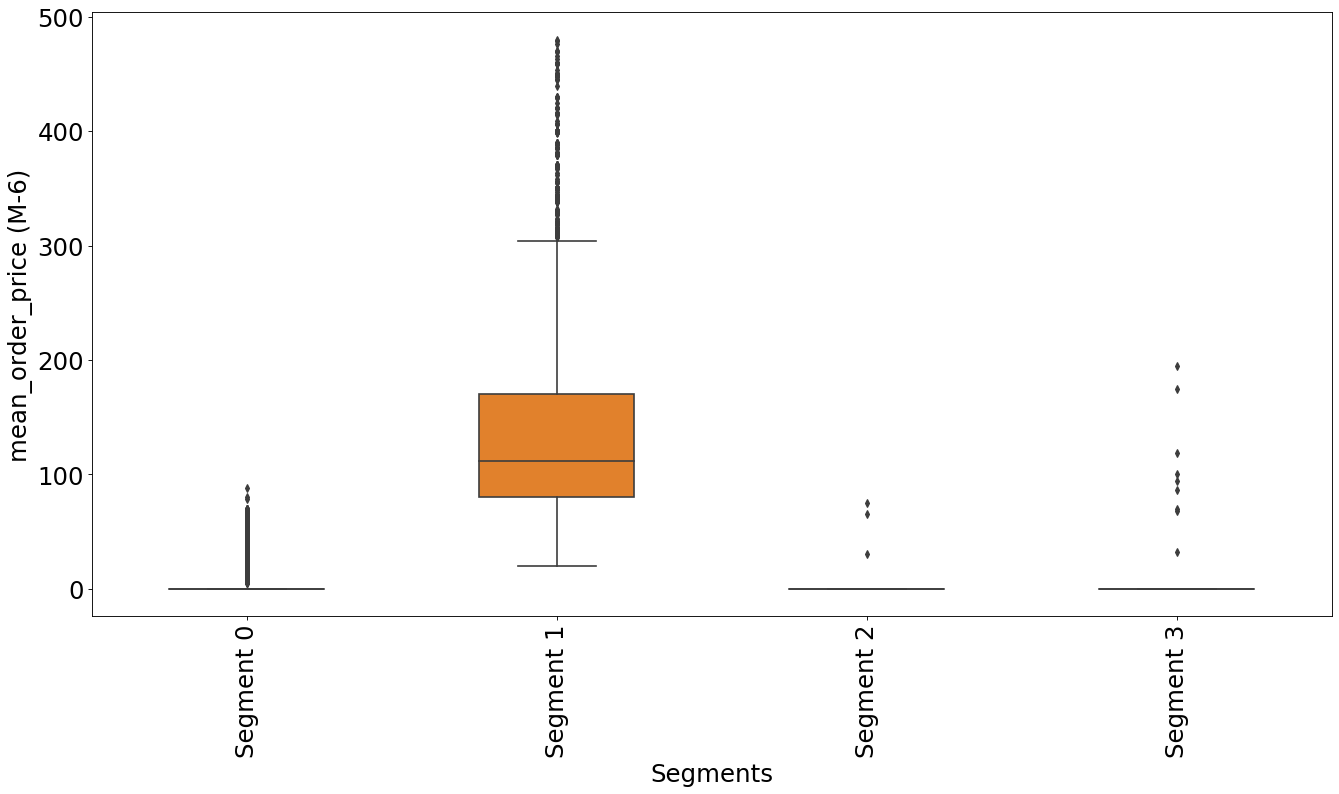

total_number_of_orders (M-9)


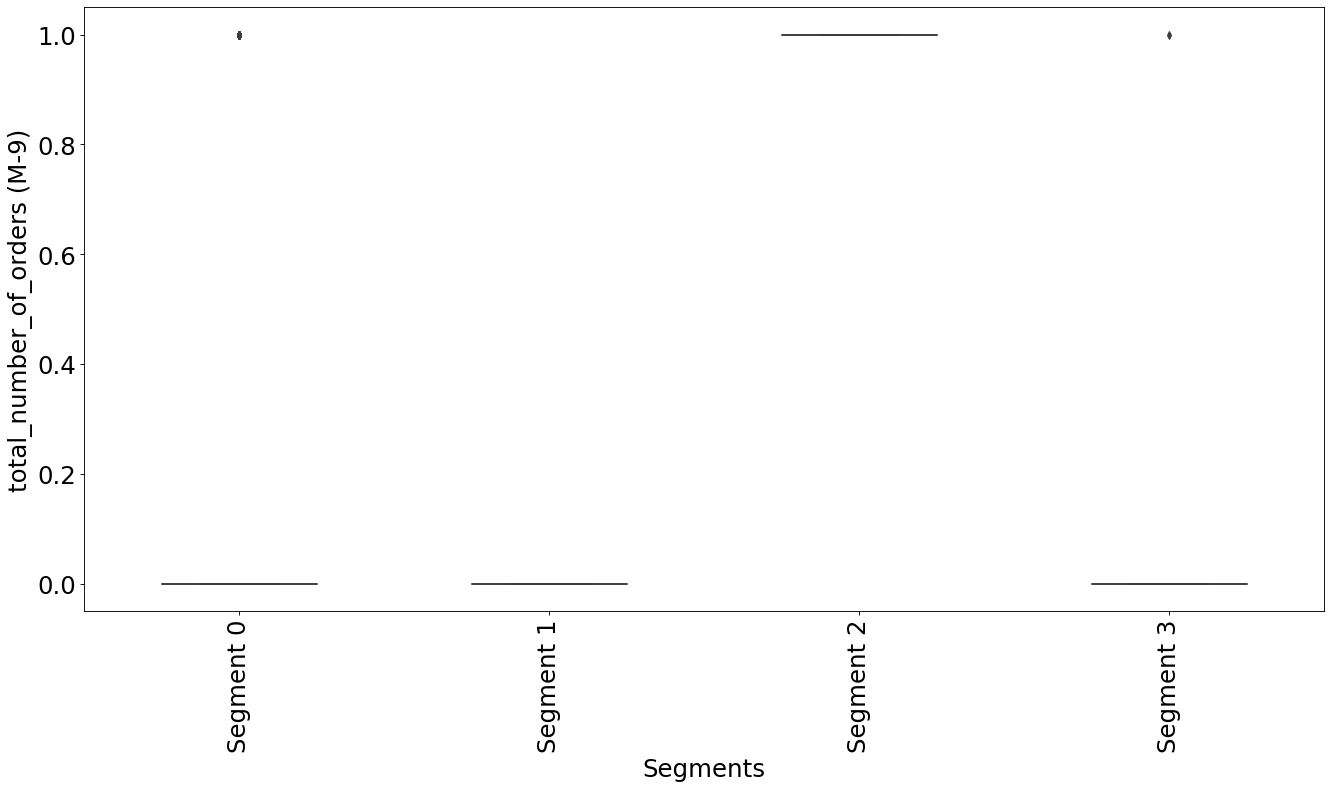

total_cost_of_orders (M-9)


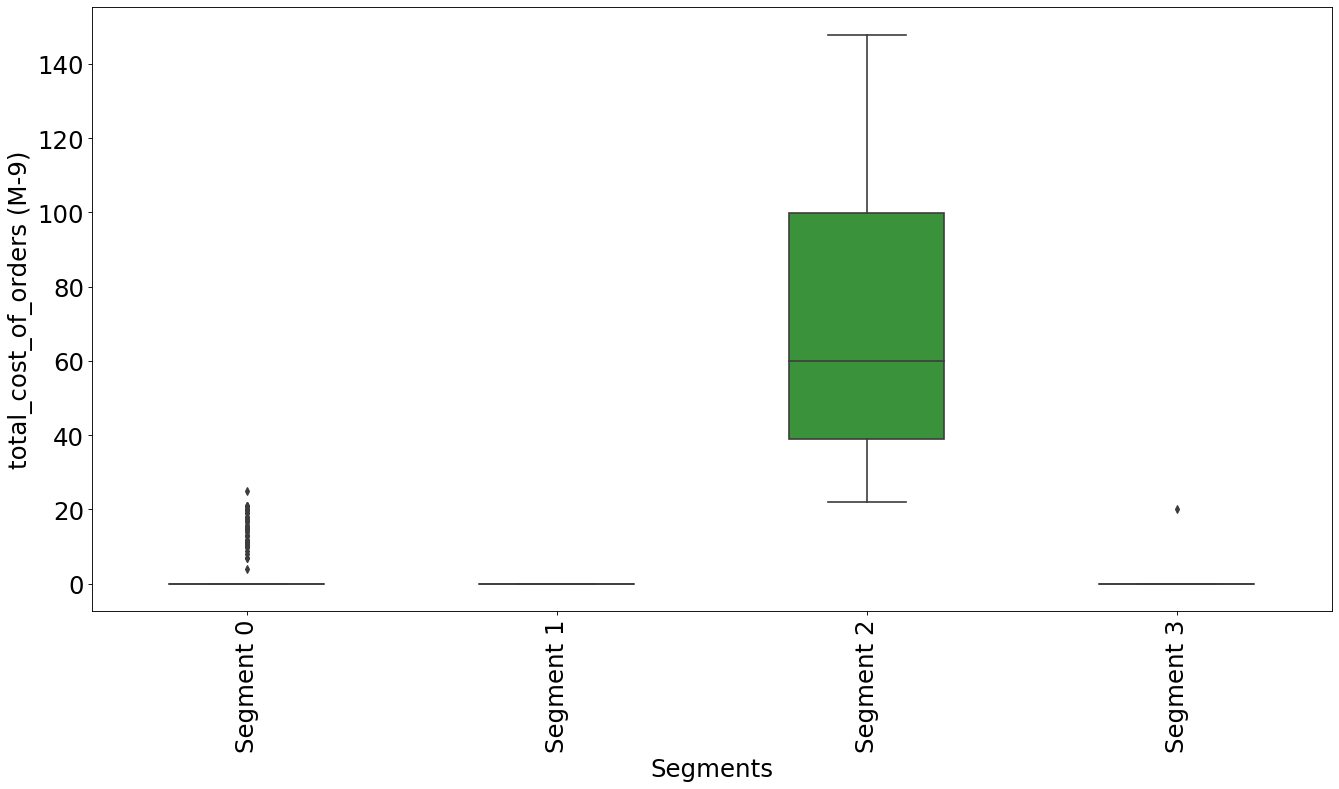

max_order_price (M-9)


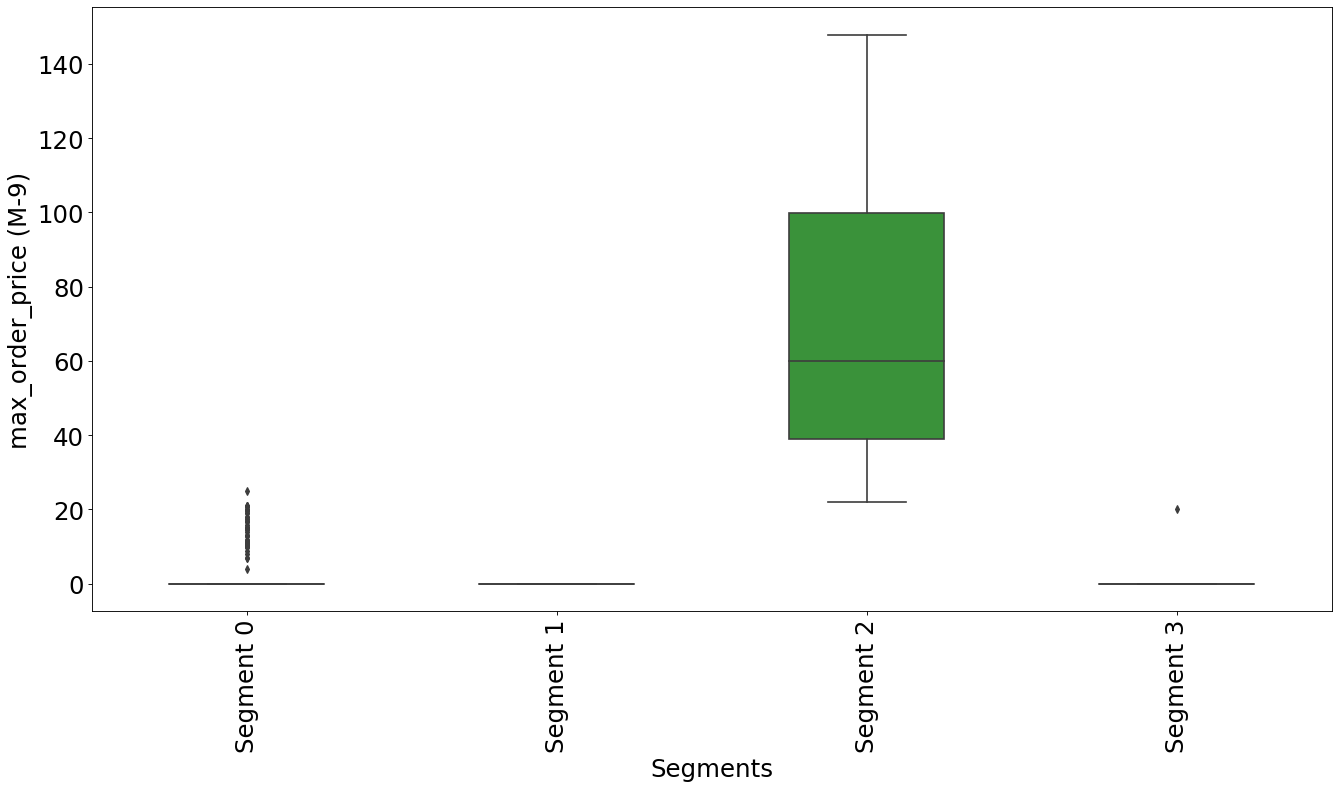

mean_order_price (M-9)


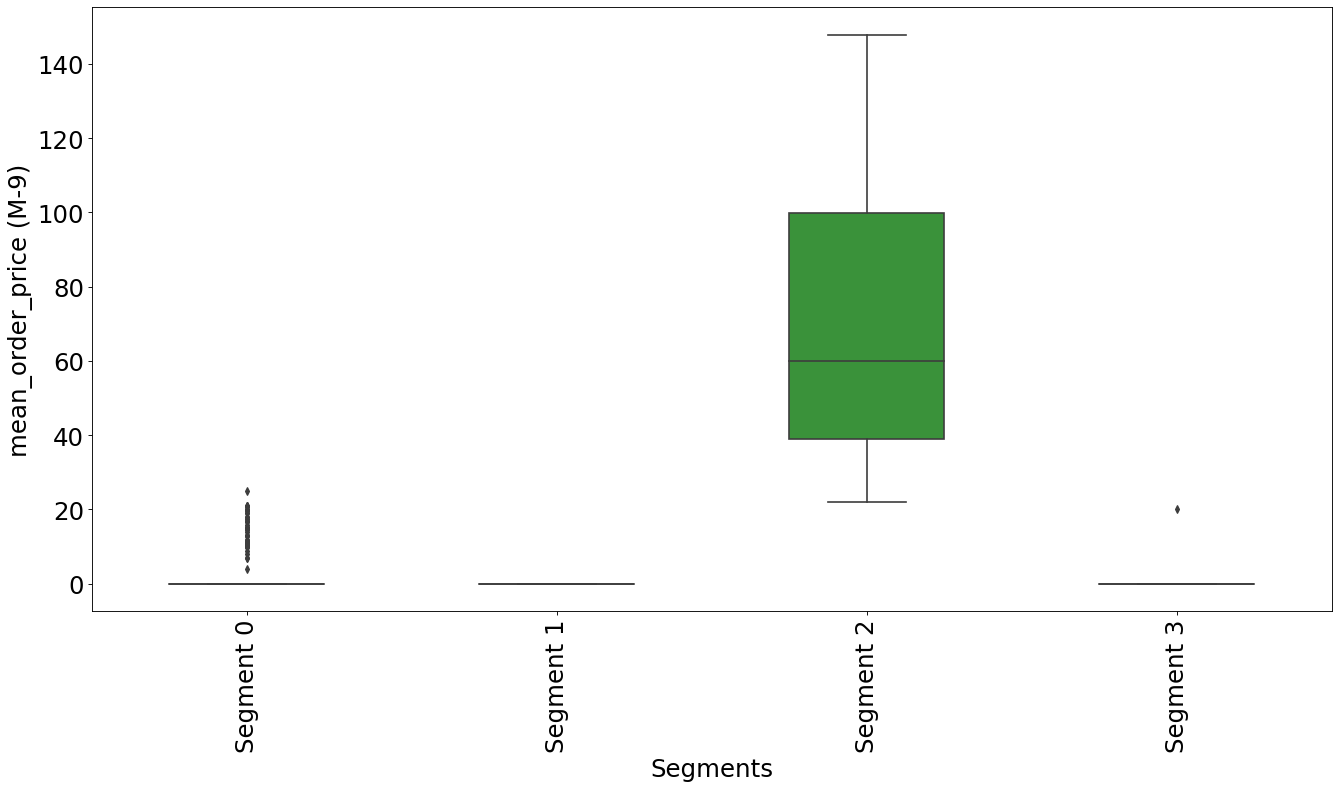

payment_installments


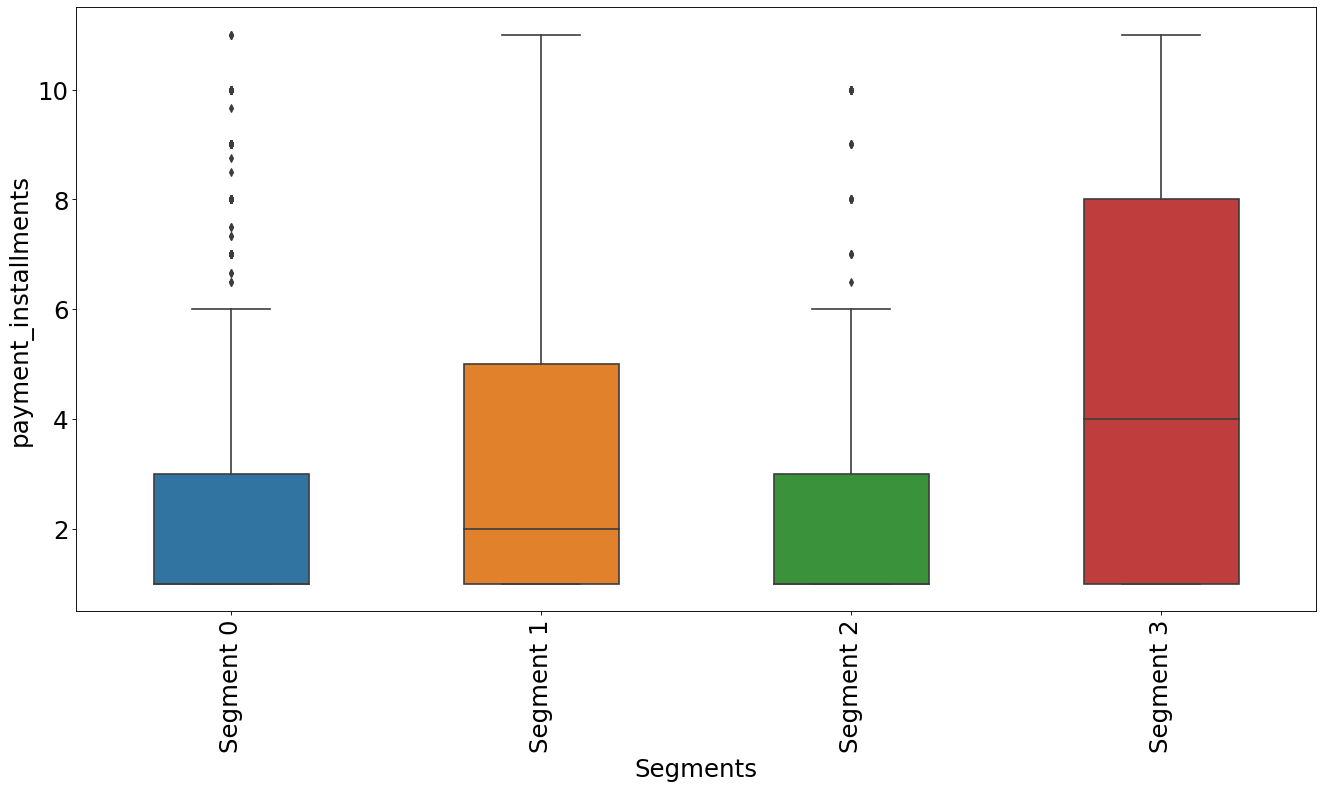

In [44]:
XX = newData.select_dtypes(['float64'])

colName = ['Segment '+str(i) for i in sampleSize.index]

dataframe = pd.DataFrame(np.nan,index = np.arange(sampleSize['max_order_price'].max()),columns=colName)
#print(dataframe.shape)

for cols in XX.columns:
    print(cols)
    
    for idx in range(0,dataframe.shape[1]):
        segment = sampleSize.index[idx]
        data0 = XX[newData['labels'] == segment]
        m = len(data0[cols])
        dataframe.iloc[0:m,idx] = data0[cols].values
        #print(segment)
        
    fig = plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
    
    ax = sns.boxplot(x="variable",y="value",data = pd.melt(dataframe),width=0.5)
    ax.set_xticklabels(dataframe.columns,rotation=90)

    plt.xlabel('Segments',fontsize=22)
    plt.ylabel(cols,fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    
    plt.show()
    
#dataframe.head(n=20)

## Evaluation de la fréquence de mise à jour de la segmentation

Cette évaluation va se faire sur la deuxième base de données.

In [67]:
data = pd.read_csv('data2018.csv')

In [68]:
data.shape

(67665, 29)

In [46]:
data.head()

customer_unique_id   customer_city customer_state  \
0  e87f0713f11e04c438f96adc52a333bb           assis             SP   
1  15dc82b7d6c3e536b3912c307fbfeaf6  santa quiteria             CE   
2  64bde37d045cf085cb670c5fe23f62e7         niteroi             RJ   
3  c0e0099353963aa2d4aeb0f79b564e1f  campina grande             PB   
4  9a70db677c8e4e9e25e36729362fe756        santiago             RS   

            last_order  last_order_day  last_order_hour  last_order_weekday  \
0  2017-12-04 21:52:54               4               21                   1   
1  2018-06-06 20:01:45               6               20                   3   
2  2017-11-30 20:48:56              30               20                   4   
3  2017-10-29 03:10:28              29                3                   7   
4  2017-09-28 19:31:57              28               19                   4   

   last_order_weekOfYear  total_number_of_orders most_purchased_product  ...  \
0                     49                       1    luggage_accessories  ...   
1                     23                       1    luggage_accessories  ...   
2                     48                       1             stationery  ...   
3                     43                       1    luggage_accessories  ...   
4                     39                       1             stationery  ...   

   total_cost_of_orders (M-6)  max_order_price (M-6)  mean_order_price (M-6)  \
0                         0.0                    0.0                     0.0   
1                         0.0                    0.0                     0.0   
2                         0.0                    0.0                     0.0   
3                         0.0                    0.0                     0.0   
4                         0.0                    0.0                     0.0   

   total_number_of_orders (M-9)  total_cost_of_orders (M-9)  \
0                           1.0                      139.90   
1                           0.0                        0.00   
2                           1.0                      199.99   
3                           0.0                        0.00   
4                           0.0                        0.00   

   max_order_price (M-9)  mean_order_price (M-9)  \
0                 139.90                  139.90   
1                   0.00                    0.00   
2                 199.99                  199.99   
3                   0.00                    0.00   
4                   0.00                    0.00   

               mean_delivery_days  payment_type  payment_installments  
0          delivery_days_le_7days   credit_card                   5.0  
1  delivery_days_between_8&14days   credit_card                   3.0  
2          delivery_days_le_7days   credit_card                   4.0  
3         delivery_days_gt_14days   credit_card                   5.0  
4  delivery_days_between_8&14days        boleto                   1.0  

[5 rows x 29 columns]

In [47]:
data.dtypes

customer_unique_id               object
customer_city                    object
customer_state                   object
last_order                       object
last_order_day                    int64
last_order_hour                   int64
last_order_weekday                int64
last_order_weekOfYear             int64
total_number_of_orders            int64
most_purchased_product           object
mean_review_score               float64
total_cost_of_orders            float64
max_order_price                 float64
mean_order_price                float64
total_number_of_orders (M-3)    float64
total_cost_of_orders (M-3)      float64
max_order_price (M-3)           float64
mean_order_price (M-3)          float64
total_number_of_orders (M-6)    float64
total_cost_of_orders (M-6)      float64
max_order_price (M-6)           float64
mean_order_price (M-6)          float64
total_number_of_orders (M-9)    float64
total_cost_of_orders (M-9)      float64
max_order_price (M-9)           float64


In [48]:
data['last_order'] = pd.to_datetime(data['last_order'])
data.set_index('customer_unique_id',inplace=True)

In [49]:
data.head()

customer_city customer_state  \
customer_unique_id                                                
e87f0713f11e04c438f96adc52a333bb           assis             SP   
15dc82b7d6c3e536b3912c307fbfeaf6  santa quiteria             CE   
64bde37d045cf085cb670c5fe23f62e7         niteroi             RJ   
c0e0099353963aa2d4aeb0f79b564e1f  campina grande             PB   
9a70db677c8e4e9e25e36729362fe756        santiago             RS   

                                          last_order  last_order_day  \
customer_unique_id                                                     
e87f0713f11e04c438f96adc52a333bb 2017-12-04 21:52:54               4   
15dc82b7d6c3e536b3912c307fbfeaf6 2018-06-06 20:01:45               6   
64bde37d045cf085cb670c5fe23f62e7 2017-11-30 20:48:56              30   
c0e0099353963aa2d4aeb0f79b564e1f 2017-10-29 03:10:28              29   
9a70db677c8e4e9e25e36729362fe756 2017-09-28 19:31:57              28   

                                  last_order_hour  last_order_weekday  \
customer_unique_id                                                      
e87f0713f11e04c438f96adc52a333bb               21                   1   
15dc82b7d6c3e536b3912c307fbfeaf6               20                   3   
64bde37d045cf085cb670c5fe23f62e7               20                   4   
c0e0099353963aa2d4aeb0f79b564e1f                3                   7   
9a70db677c8e4e9e25e36729362fe756               19                   4   

                                  last_order_weekOfYear  \
customer_unique_id                                        
e87f0713f11e04c438f96adc52a333bb                     49   
15dc82b7d6c3e536b3912c307fbfeaf6                     23   
64bde37d045cf085cb670c5fe23f62e7                     48   
c0e0099353963aa2d4aeb0f79b564e1f                     43   
9a70db677c8e4e9e25e36729362fe756                     39   

                                  total_number_of_orders  \
customer_unique_id                                         
e87f0713f11e04c438f96adc52a333bb                       1   
15dc82b7d6c3e536b3912c307fbfeaf6                       1   
64bde37d045cf085cb670c5fe23f62e7                       1   
c0e0099353963aa2d4aeb0f79b564e1f                       1   
9a70db677c8e4e9e25e36729362fe756                       1   

                                 most_purchased_product  mean_review_score  \
customer_unique_id                                                           
e87f0713f11e04c438f96adc52a333bb    luggage_accessories                5.0   
15dc82b7d6c3e536b3912c307fbfeaf6    luggage_accessories                5.0   
64bde37d045cf085cb670c5fe23f62e7             stationery                5.0   
c0e0099353963aa2d4aeb0f79b564e1f    luggage_accessories                5.0   
9a70db677c8e4e9e25e36729362fe756             stationery                5.0   

                                  ...  total_cost_of_orders (M-6)  \
customer_unique_id                ...                               
e87f0713f11e04c438f96adc52a333bb  ...                         0.0   
15dc82b7d6c3e536b3912c307fbfeaf6  ...                         0.0   
64bde37d045cf085cb670c5fe23f62e7  ...                         0.0   
c0e0099353963aa2d4aeb0f79b564e1f  ...                         0.0   
9a70db677c8e4e9e25e36729362fe756  ...                         0.0   

                                  max_order_price (M-6)  \
customer_unique_id                                        
e87f0713f11e04c438f96adc52a333bb                    0.0   
15dc82b7d6c3e536b3912c307fbfeaf6                    0.0   
64bde37d045cf085cb670c5fe23f62e7                    0.0   
c0e0099353963aa2d4aeb0f79b564e1f                    0.0   
9a70db677c8e4e9e25e36729362fe756                    0.0   

                                  mean_order_price (M-6)  \
customer_unique_id                                         
e87f0713f11e04c438f96adc52a333bb                     0.0   
15dc82b7d6c3e536b3912c307fbfeaf6                     0.0   
64bde37d045cf085cb670c5fe23f

In [50]:
data.isna().sum()

customer_city                   0
customer_state                  0
last_order                      0
last_order_day                  0
last_order_hour                 0
last_order_weekday              0
last_order_weekOfYear           0
total_number_of_orders          0
most_purchased_product          0
mean_review_score               0
total_cost_of_orders            0
max_order_price                 0
mean_order_price                0
total_number_of_orders (M-3)    0
total_cost_of_orders (M-3)      0
max_order_price (M-3)           0
mean_order_price (M-3)          0
total_number_of_orders (M-6)    0
total_cost_of_orders (M-6)      0
max_order_price (M-6)           0
mean_order_price (M-6)          0
total_number_of_orders (M-9)    0
total_cost_of_orders (M-9)      0
max_order_price (M-9)           0
mean_order_price (M-9)          0
mean_delivery_days              0
payment_type                    0
payment_installments            0
dtype: int64

## ACP

In [51]:
X = data.drop(['customer_city','customer_state','most_purchased_product'],axis=1)

catColumns = X.select_dtypes(include=['object']).columns
numColumns = X.select_dtypes(include=['int64','float64']).columns

encoder = OneHotEncoder(sparse=False)
std_scale = StandardScaler().fit(X[numColumns])

encodedData = pd.DataFrame(data = encoder.fit_transform(
    X[catColumns]),index=X.index,columns=encoder.get_feature_names().tolist()).astype('int32')

X2 = std_scale.transform(X[numColumns])
X_scaled = pd.DataFrame(data = X2,index=X.index,columns=numColumns)

newX = X_scaled.merge(encodedData,left_index = True, right_index = True)
newX.head()

last_order_day  last_order_hour  \
customer_unique_id                                                  
e87f0713f11e04c438f96adc52a333bb       -1.324824         1.171453   
15dc82b7d6c3e536b3912c307fbfeaf6       -1.092383         0.983706   
64bde37d045cf085cb670c5fe23f62e7        1.696904         0.983706   
c0e0099353963aa2d4aeb0f79b564e1f        1.580684        -2.208008   
9a70db677c8e4e9e25e36729362fe756        1.464463         0.795958   

                                  last_order_weekday  last_order_weekOfYear  \
customer_unique_id                                                            
e87f0713f11e04c438f96adc52a333bb           -1.404553               1.579338   
15dc82b7d6c3e536b3912c307fbfeaf6           -0.389091              -0.150846   
64bde37d045cf085cb670c5fe23f62e7            0.118639               1.512793   
c0e0099353963aa2d4aeb0f79b564e1f            1.641832               1.180065   
9a70db677c8e4e9e25e36729362fe756            0.118639               0.913883   

                                  total_number_of_orders  mean_review_score  \
customer_unique_id                                                            
e87f0713f11e04c438f96adc52a333bb               -0.325126           0.676007   
15dc82b7d6c3e536b3912c307fbfeaf6               -0.325126           0.676007   
64bde37d045cf085cb670c5fe23f62e7               -0.325126           0.676007   
c0e0099353963aa2d4aeb0f79b564e1f               -0.325126           0.676007   
9a70db677c8e4e9e25e36729362fe756               -0.325126           0.676007   

                                  total_cost_of_orders  max_order_price  \
customer_unique_id                                                        
e87f0713f11e04c438f96adc52a333bb              0.389205         0.556496   
15dc82b7d6c3e536b3912c307fbfeaf6              3.043293         3.538227   
64bde37d045cf085cb670c5fe23f62e7              1.082343         1.335201   
c0e0099353963aa2d4aeb0f79b564e1f              2.466543         2.890278   
9a70db677c8e4e9e25e36729362fe756              1.081305         1.334035   

                                  mean_order_price  \
customer_unique_id                                   
e87f0713f11e04c438f96adc52a333bb          0.572862   
15dc82b7d6c3e536b3912c307fbfeaf6          3.579665   
64bde37d045cf085cb670c5fe23f62e7          1.358115   
c0e0099353963aa2d4aeb0f79b564e1f          2.926268   
9a70db677c8e4e9e25e36729362fe756          1.356939   

                                  total_number_of_orders (M-3)  ...  \
customer_unique_id                                              ...   
e87f0713f11e04c438f96adc52a333bb                     -0.558547  ...   
15dc82b7d6c3e536b3912c307fbfeaf6                      1.419372  ...   
64bde37d045cf085cb670c5fe23f62e7                     -0.558547  ...   
c0e0099353963aa2d4aeb0f79b564e1f                     -0.558547  ...   
9a70db677c8e4e9e25e36729362fe756                     -0.558547  ...   

                                  mean_order_price (M-9)  \
customer_unique_id                                         
e87f0713f11e04c438f96adc52a333bb                2.174099   
15dc82b7d6c3e536b3912c307fbfeaf6               -0.457460   
64bde37d045cf085cb670c5fe23f62e7                3.304410   
c0e0099353963aa2d4aeb0f79b564e1f               -0.457460   
9a70db677c8e4e9e25e36729362fe756               -0.457460   

                                  payment_installments  \
customer_unique_id                                       
e87f0713f11e04c438f96adc52a333bb              0.997256   
15dc82b7d6c3e536b3912c307fbfeaf6              0.154089   
64bde37d045cf085cb670c5fe23f62e7              0.575672   
c0e0099353963aa2d4aeb0f79b564e1f              0.997256   
9a70db677c8e4e9e25e36729362fe756             -0.689078   

                                  x0_delivery_days_between_8&14days  \
customer_unique_id                                                    
e87f0713f11e04c438f96adc52a333bb                                  0  

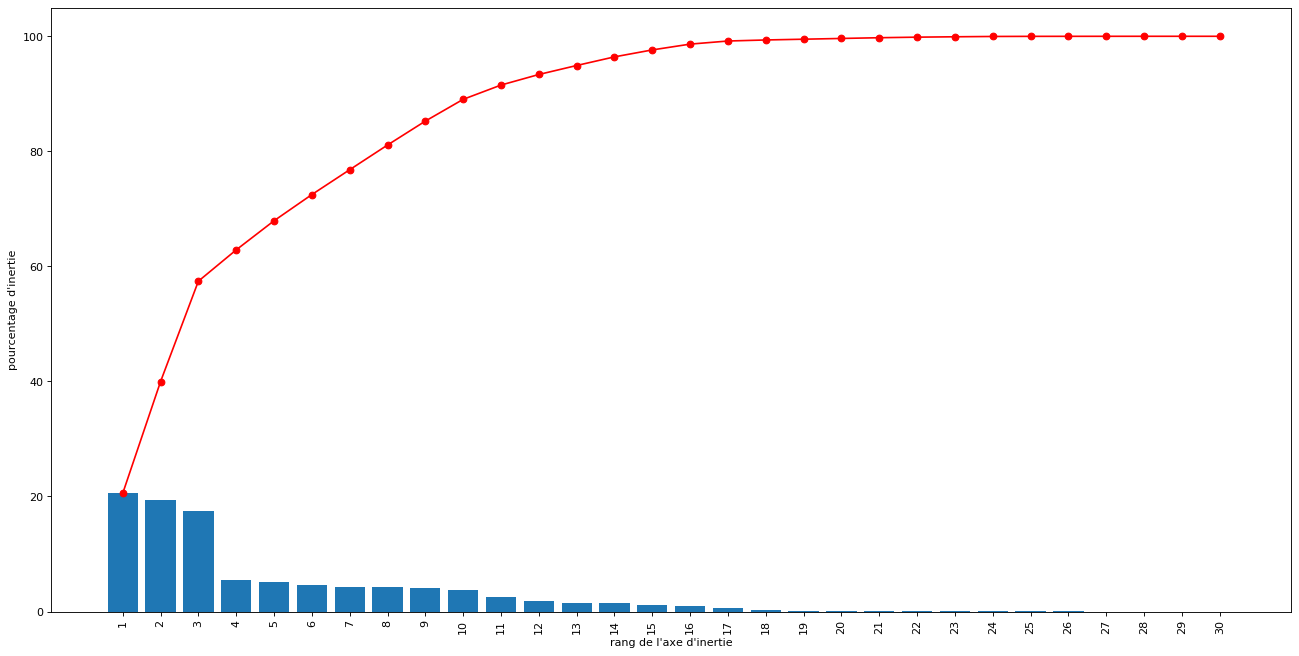

In [52]:
# Calcul de l'ACP
acp = decomposition.PCA()
acp.fit(newX)

# Représentation des valeurs propres

vp = acp.explained_variance_ratio_*100

fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.bar(np.arange(len(vp))+1, vp)
plt.plot(np.arange(len(vp))+1, vp.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.xticks(np.arange(len(vp))+1)

ax.set_xticklabels(np.arange(len(vp))+1,rotation=90)

plt.show()

In [53]:
# Détermination du nombre de facteur à retenir (test des batons brisés)

## Détermination des valeurs propres
eigval = (newX.shape[0]-1)/newX.shape[0]*acp.explained_variance_

## Détermination des seuils
seuil = 1/np.arange(len(newX.columns),0,-1)
seuil = np.cumsum(seuil)
seuil[::-1]

testData= pd.DataFrame({'Eigen Values':eigval,'Thresold':seuil})

pd.options.display.max_rows = 130
testData

Eigen Values  Thresold
0   4.732126e+00  0.033333
1   4.476135e+00  0.067816
2   4.022361e+00  0.103530
3   1.253475e+00  0.140567
4   1.166225e+00  0.179029
5   1.049298e+00  0.219029
6   9.948517e-01  0.260696
7   9.891329e-01  0.304174
8   9.582240e-01  0.349628
9   8.721145e-01  0.397247
10  5.714550e-01  0.447247
11  4.232858e-01  0.499879
12  3.602044e-01  0.555435
13  3.460013e-01  0.614258
14  2.783767e-01  0.676758
15  2.319022e-01  0.743425
16  1.244162e-01  0.814853
17  4.185656e-02  0.891776
18  3.066970e-02  0.975110
19  3.011504e-02  1.066019
20  2.944384e-02  1.166019
21  2.229085e-02  1.277130
22  1.539578e-02  1.402130
23  1.243824e-02  1.544987
24  4.420554e-03  1.711654
25  1.129646e-03  1.911654
26  9.762758e-04  2.161654
27  5.627636e-04  2.494987
28  4.235395e-32  2.994987
29  2.542675e-32  3.994987

In [54]:
thrsld = 1+2*np.sqrt((len(newX.columns)-1)/(newX.shape[0]-1))
thrsld

1.041404749425711

In [55]:
sum(vp[0:10])

89.04052484214523

In [56]:
PCs = ['PC'+str(i+1) for i in range(newX.shape[1])]

projectedValues = acp.transform(newX)

projectedValuesDF = pd.DataFrame(projectedValues,columns=PCs)
projectedValuesDF.index = newX.index

X_new = projectedValuesDF.iloc[:,:10]
X_new.head()

PC1       PC2       PC3       PC4  \
customer_unique_id                                                         
e87f0713f11e04c438f96adc52a333bb -3.320264 -1.885579  2.122334 -0.677401   
15dc82b7d6c3e536b3912c307fbfeaf6  0.071616  9.755016  6.560290  0.507758   
64bde37d045cf085cb670c5fe23f62e7 -4.286655 -2.541226  3.889975 -0.240348   
c0e0099353963aa2d4aeb0f79b564e1f -0.052166  0.415158  3.207503 -3.437584   
9a70db677c8e4e9e25e36729362fe756 -0.228483  0.176712  0.739999 -2.273191   

                                       PC5       PC6       PC7       PC8  \
customer_unique_id                                                         
e87f0713f11e04c438f96adc52a333bb -0.417258 -0.485017 -0.001079  2.013939   
15dc82b7d6c3e536b3912c307fbfeaf6 -1.425411 -0.786692  0.023202  1.061309   
64bde37d045cf085cb670c5fe23f62e7 -0.739350  0.805749 -1.695383  0.024274   
c0e0099353963aa2d4aeb0f79b564e1f  1.459059  1.187414  0.813469 -2.512583   
9a70db677c8e4e9e25e36729362fe756  0.357745  0.964719 -1.012407  0.283499   

                                       PC9      PC10  
customer_unique_id                                    
e87f0713f11e04c438f96adc52a333bb -0.385591 -0.968763  
15dc82b7d6c3e536b3912c307fbfeaf6 -0.070201  0.955186  
64bde37d045cf085cb670c5fe23f62e7  0.685433  0.020840  
c0e0099353963aa2d4aeb0f79b564e1f  0.866070  0.826915  
9a70db677c8e4e9e25e36729362fe756  0.408477  1.836114

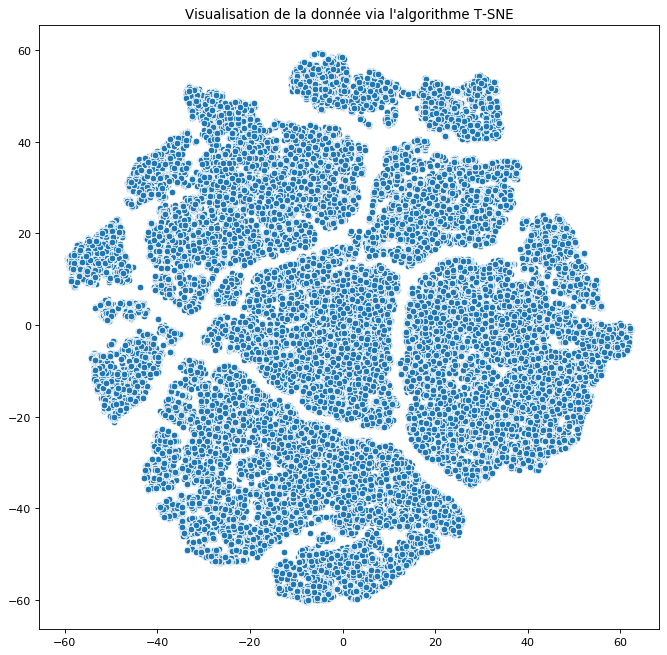

In [57]:
X_embedded = TSNE(n_components=2).fit_transform(X_new)

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation de la donnée via l'algorithme T-SNE")
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1])

In [58]:
X_embedded.shape

(67665, 2)

In [59]:
models = {}
variance = {}
silhouetteScore = {}
daviesBouldin_score = {}

for k in range(2,10):
    km = KMeans(n_clusters=k,random_state=0,n_jobs=-1).fit(X_new)
    
    models[k] = km
    variance[k] = km.inertia_
    silhouetteScore[k] = metrics.silhouette_score(X_new,km.labels_)
    daviesBouldin_score[k] = metrics.davies_bouldin_score(X_new,km.labels_)

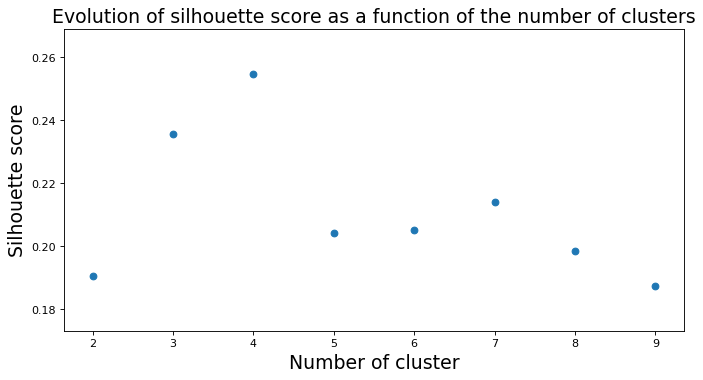

In [60]:
fig,ax = plt.subplots(figsize=(10,5), dpi= 80, facecolor='w', edgecolor='k')


plt.title('Evolution of silhouette score as a function of the number of clusters',fontsize=17)
plt.scatter(list(silhouetteScore.keys()),list(silhouetteScore.values()))

#plt.xlim([-50,50])
#plt.ylim([-50,50])
plt.xlabel('Number of cluster',fontsize=17)
plt.ylabel('Silhouette score',fontsize=17)

plt.show()

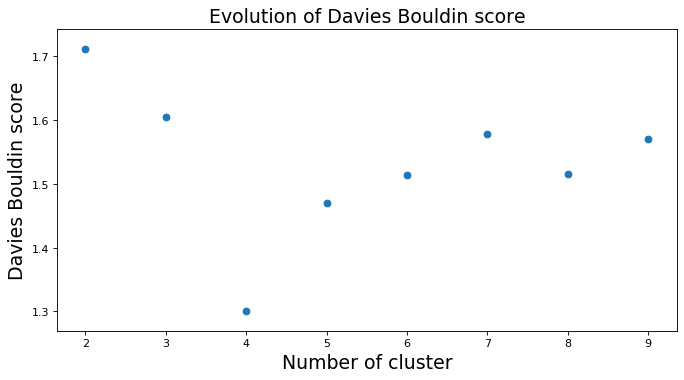

In [61]:
fig,ax = plt.subplots(figsize=(10,5), dpi= 80, facecolor='w', edgecolor='k')


plt.title('Evolution of Davies Bouldin score',fontsize=17)
plt.scatter(list(daviesBouldin_score.keys()),list(daviesBouldin_score.values()))

#plt.xlim([-50,50])
#plt.ylim([-50,50])
plt.xlabel('Number of cluster',fontsize=17)
plt.ylabel('Davies Bouldin score',fontsize=17)

plt.show()

In [ ]:
nbClusters = 4

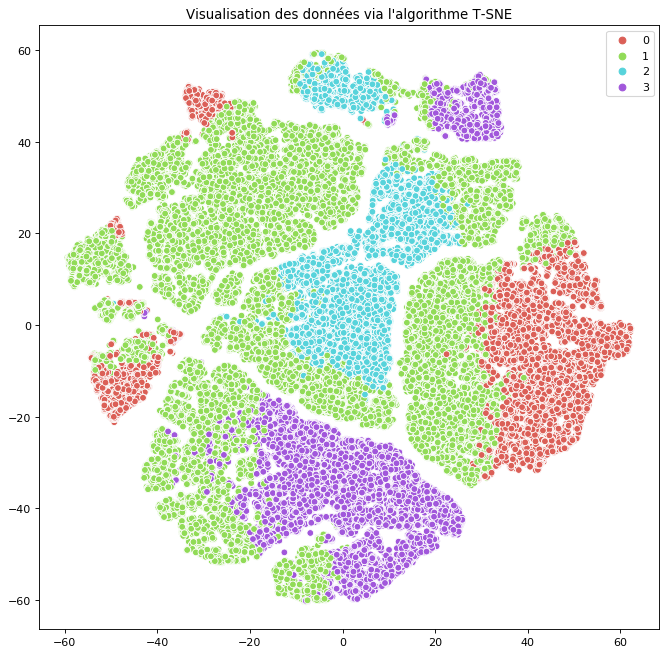

In [62]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation des données via l'algorithme T-SNE")
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1],
                    hue=models[nbClusters].labels_,
                    legend='full',palette=sns.color_palette("hls",nbClusters))

plt.show()

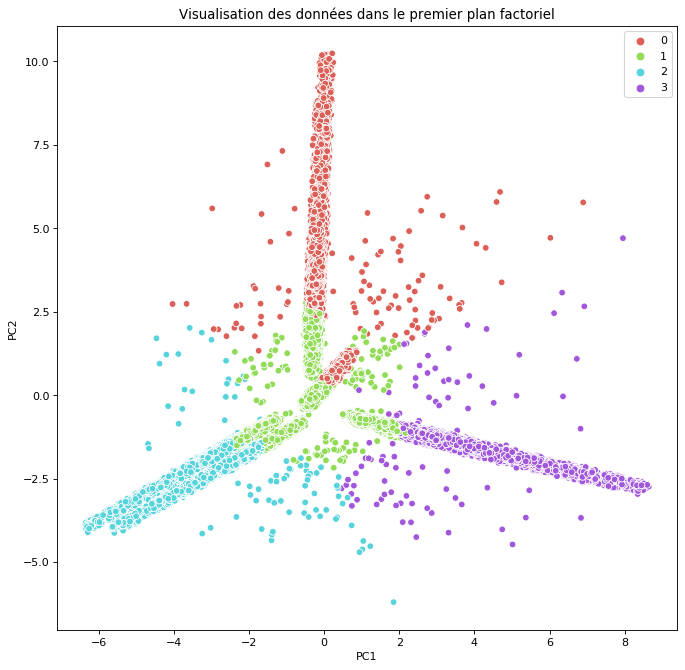

In [63]:
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Visualisation des données dans le premier plan factoriel")
g = sns.scatterplot(X_new.iloc[:,0], X_new.iloc[:,1],
                    hue=models[nbClusters].labels_,
                    legend='full',palette=sns.color_palette("hls",nbClusters))
plt.show()

In [64]:
newData = data.copy()
newData['labels'] = models[nbClusters].labels_
#newData.set_index('labels',inplace=True)
newData.head()

customer_city customer_state  \
customer_unique_id                                                
e87f0713f11e04c438f96adc52a333bb           assis             SP   
15dc82b7d6c3e536b3912c307fbfeaf6  santa quiteria             CE   
64bde37d045cf085cb670c5fe23f62e7         niteroi             RJ   
c0e0099353963aa2d4aeb0f79b564e1f  campina grande             PB   
9a70db677c8e4e9e25e36729362fe756        santiago             RS   

                                          last_order  last_order_day  \
customer_unique_id                                                     
e87f0713f11e04c438f96adc52a333bb 2017-12-04 21:52:54               4   
15dc82b7d6c3e536b3912c307fbfeaf6 2018-06-06 20:01:45               6   
64bde37d045cf085cb670c5fe23f62e7 2017-11-30 20:48:56              30   
c0e0099353963aa2d4aeb0f79b564e1f 2017-10-29 03:10:28              29   
9a70db677c8e4e9e25e36729362fe756 2017-09-28 19:31:57              28   

                                  last_order_hour  last_order_weekday  \
customer_unique_id                                                      
e87f0713f11e04c438f96adc52a333bb               21                   1   
15dc82b7d6c3e536b3912c307fbfeaf6               20                   3   
64bde37d045cf085cb670c5fe23f62e7               20                   4   
c0e0099353963aa2d4aeb0f79b564e1f                3                   7   
9a70db677c8e4e9e25e36729362fe756               19                   4   

                                  last_order_weekOfYear  \
customer_unique_id                                        
e87f0713f11e04c438f96adc52a333bb                     49   
15dc82b7d6c3e536b3912c307fbfeaf6                     23   
64bde37d045cf085cb670c5fe23f62e7                     48   
c0e0099353963aa2d4aeb0f79b564e1f                     43   
9a70db677c8e4e9e25e36729362fe756                     39   

                                  total_number_of_orders  \
customer_unique_id                                         
e87f0713f11e04c438f96adc52a333bb                       1   
15dc82b7d6c3e536b3912c307fbfeaf6                       1   
64bde37d045cf085cb670c5fe23f62e7                       1   
c0e0099353963aa2d4aeb0f79b564e1f                       1   
9a70db677c8e4e9e25e36729362fe756                       1   

                                 most_purchased_product  mean_review_score  \
customer_unique_id                                                           
e87f0713f11e04c438f96adc52a333bb    luggage_accessories                5.0   
15dc82b7d6c3e536b3912c307fbfeaf6    luggage_accessories                5.0   
64bde37d045cf085cb670c5fe23f62e7             stationery                5.0   
c0e0099353963aa2d4aeb0f79b564e1f    luggage_accessories                5.0   
9a70db677c8e4e9e25e36729362fe756             stationery                5.0   

                                  ...  max_order_price (M-6)  \
customer_unique_id                ...                          
e87f0713f11e04c438f96adc52a333bb  ...                    0.0   
15dc82b7d6c3e536b3912c307fbfeaf6  ...                    0.0   
64bde37d045cf085cb670c5fe23f62e7  ...                    0.0   
c0e0099353963aa2d4aeb0f79b564e1f  ...                    0.0   
9a70db677c8e4e9e25e36729362fe756  ...                    0.0   

                                  mean_order_price (M-6)  \
customer_unique_id                                         
e87f0713f11e04c438f96adc52a333bb                     0.0   
15dc82b7d6c3e536b3912c307fbfeaf6                     0.0   
64bde37d045cf085cb670c5fe23f62e7                     0.0   
c0e0099353963aa2d4aeb0f79b564e1f                     0.0   
9a70db677c8e4e9e25e36729362fe756                     0.0   

                                  total_number_of_orders (M-9)  \
customer_unique_id                                               
e87f0713f11e04c438f96adc52a333bb                           1.0   
15dc82b7d6c3e536b3912c307fbfeaf6                           0.0   
64bde37d045cf085cb670c5fe23f62e7

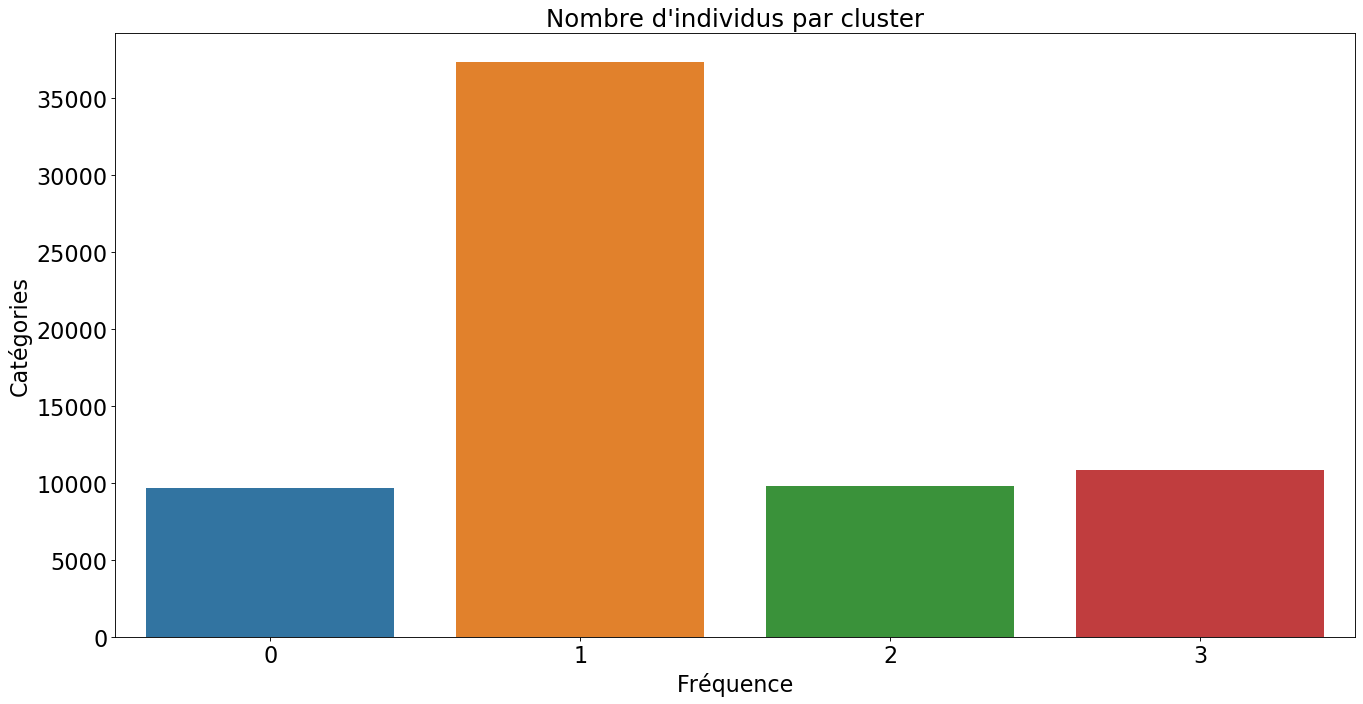

In [65]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

sampleSize = newData[['max_order_price','labels']].groupby('labels').count()

g = sns.barplot(x=sampleSize.index, y=sampleSize['max_order_price'],ax=ax)

plt.title("Nombre d'individus par cluster",fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Catégories",fontsize=20)
plt.xlabel("Fréquence",fontsize=20)

plt.show()

mean_review_score


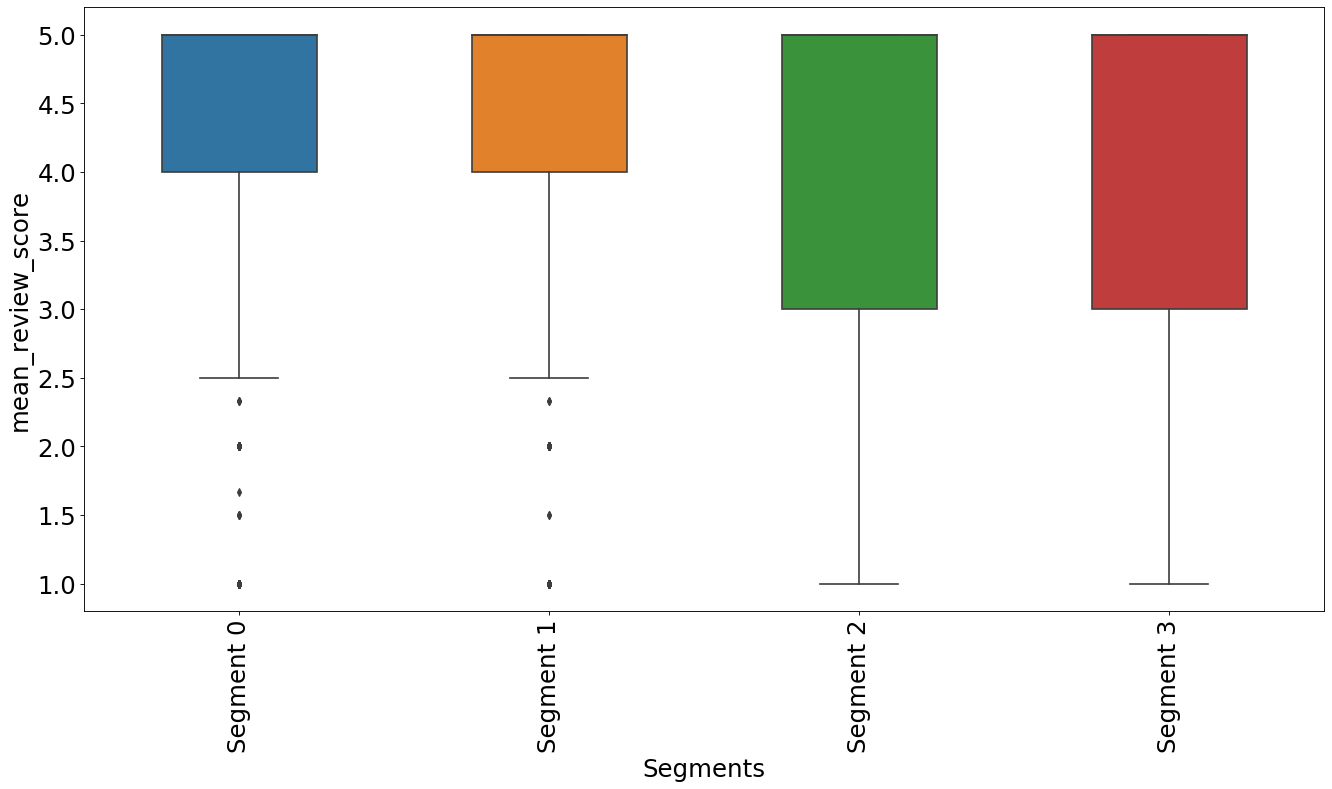

total_cost_of_orders


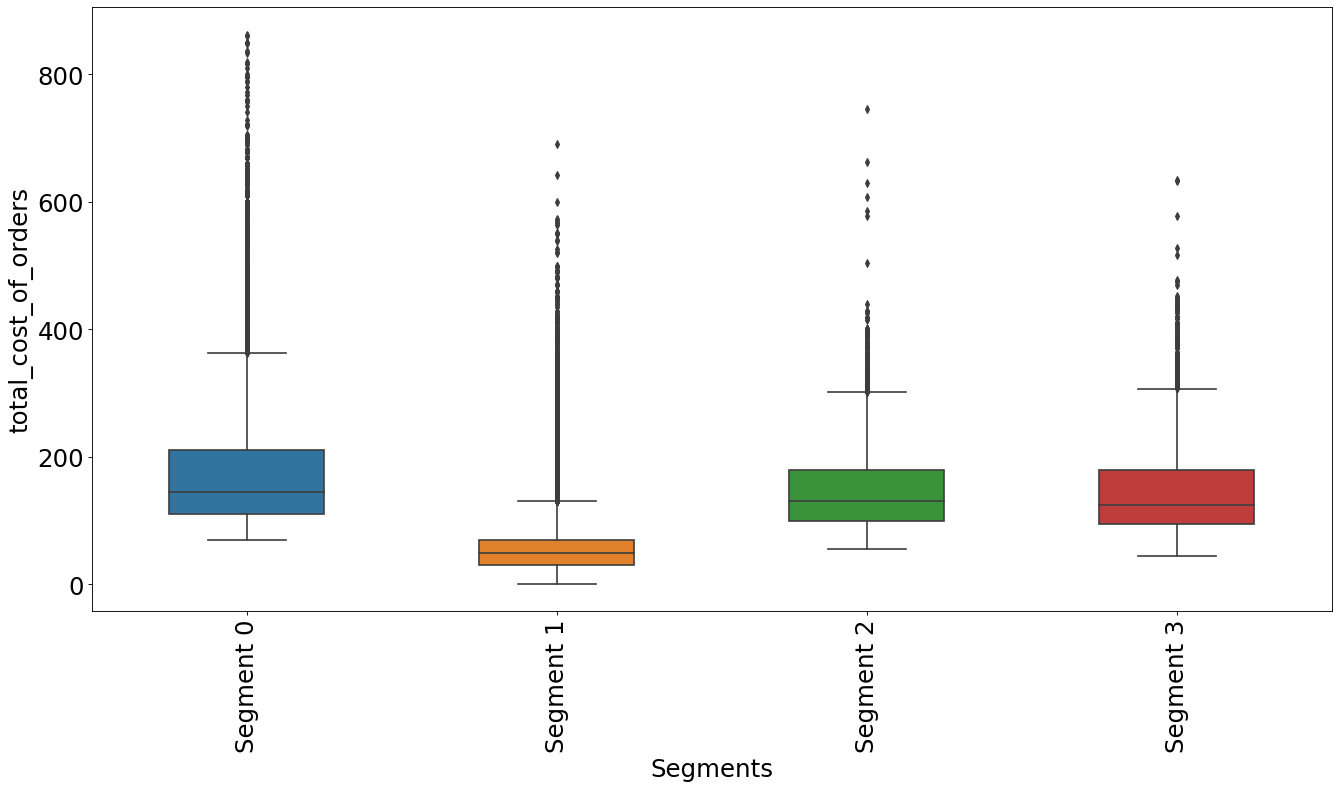

max_order_price


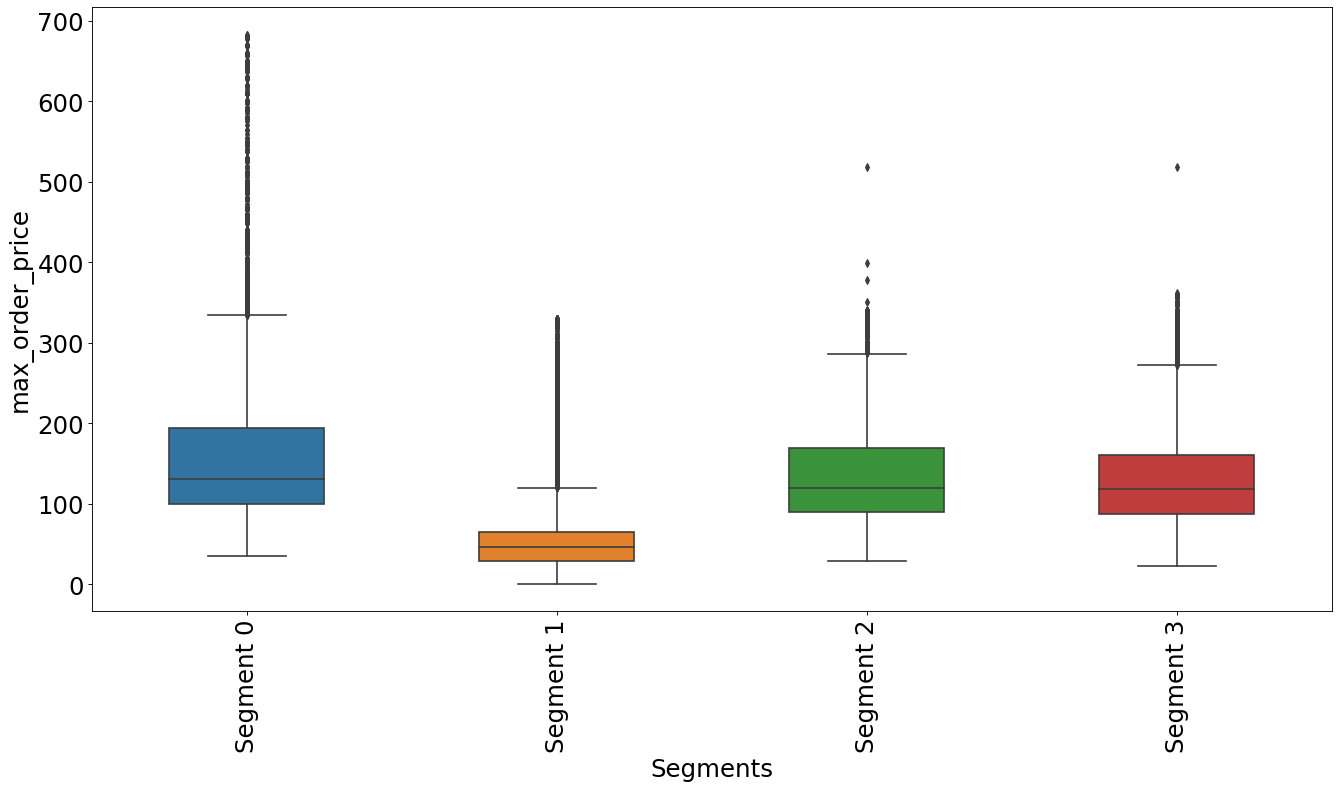

mean_order_price


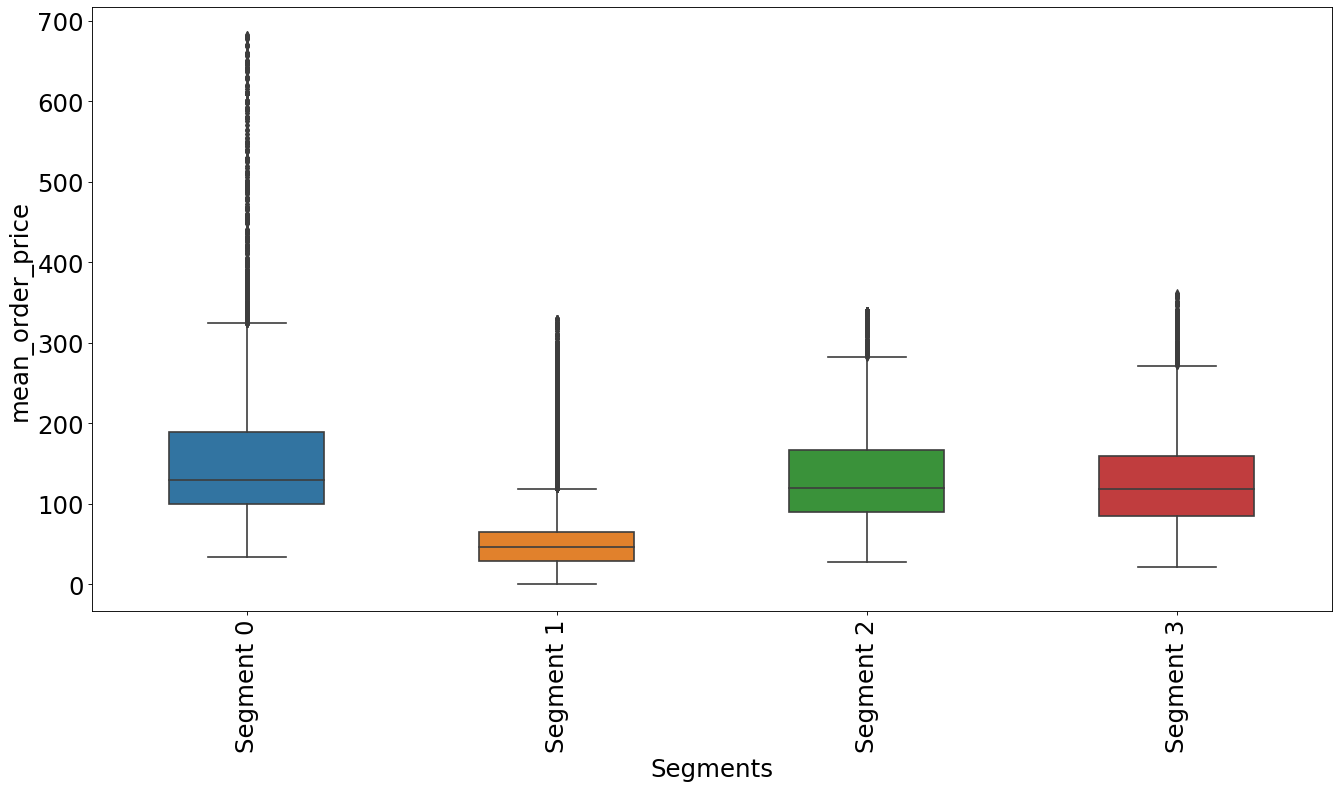

total_number_of_orders (M-3)


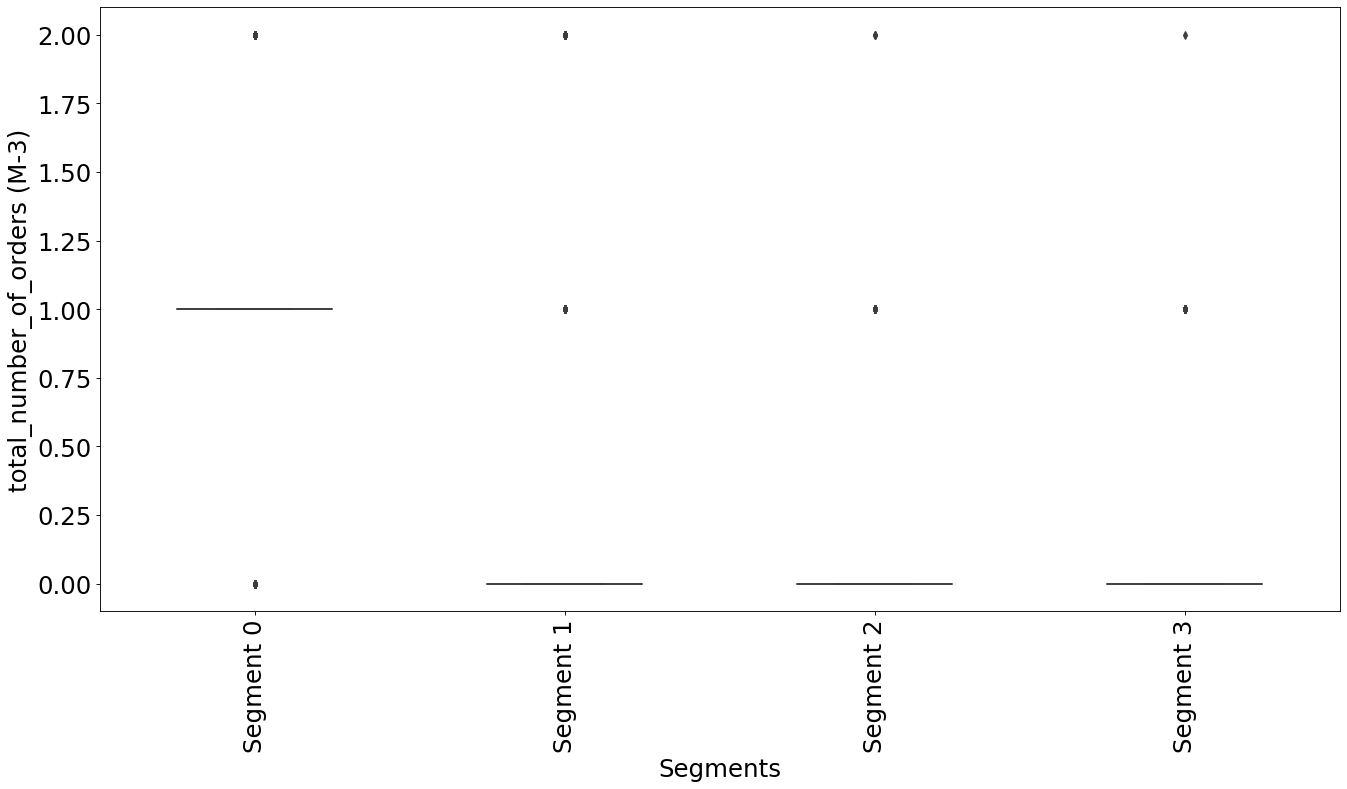

total_cost_of_orders (M-3)


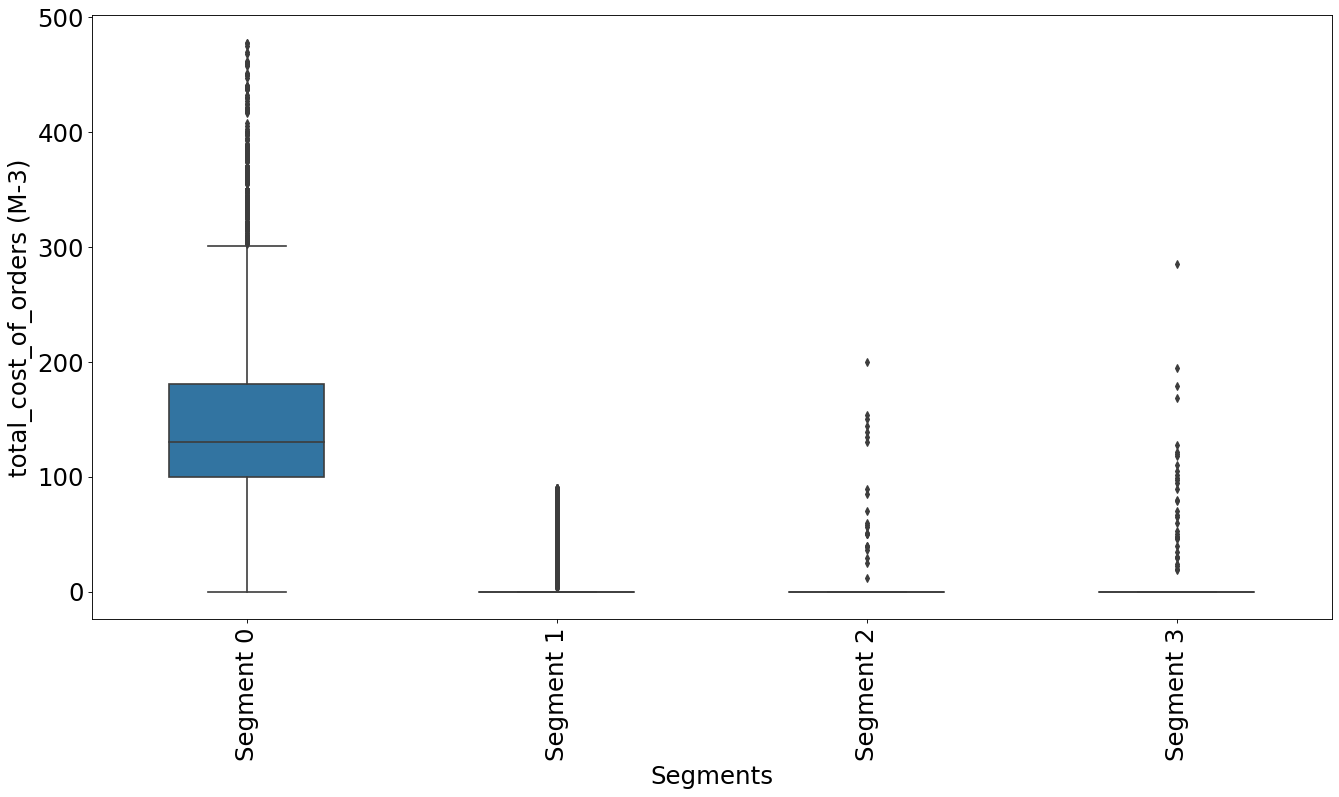

max_order_price (M-3)


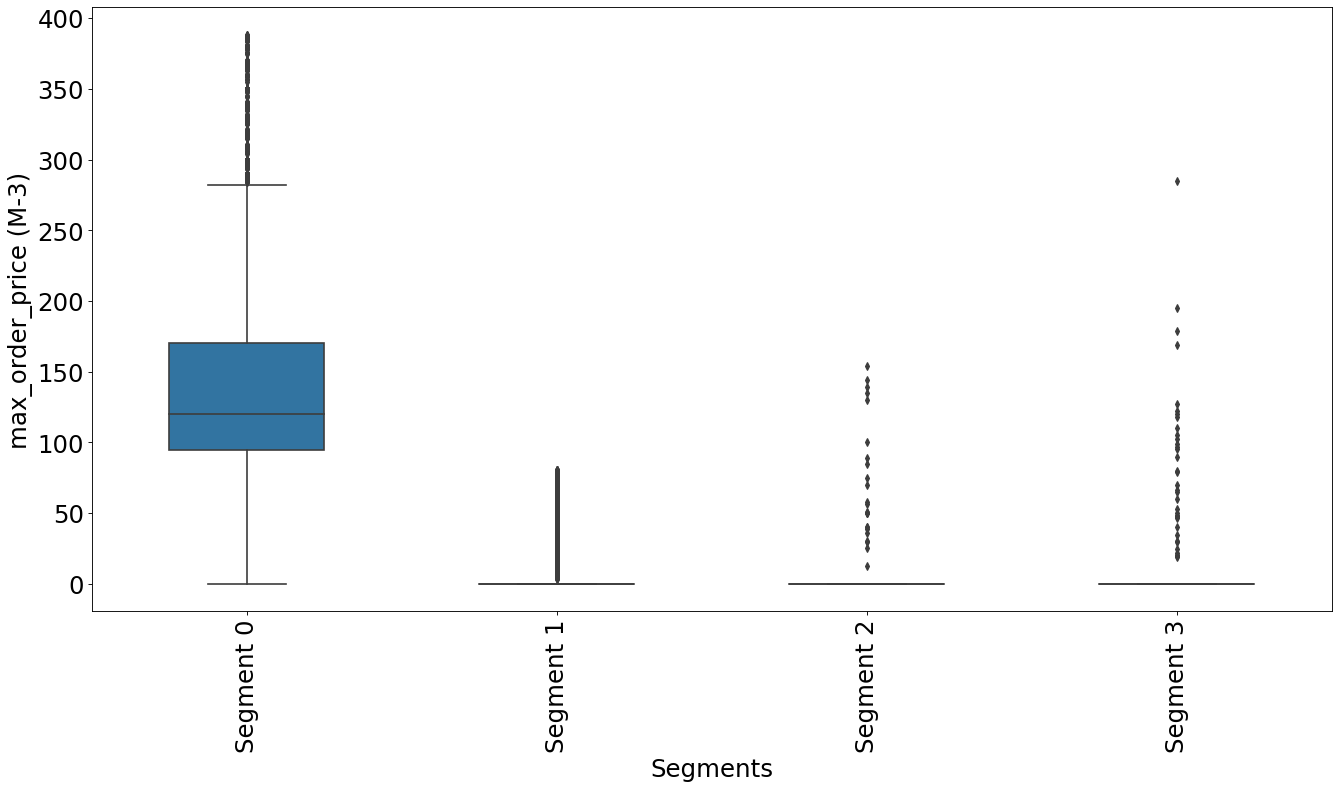

mean_order_price (M-3)


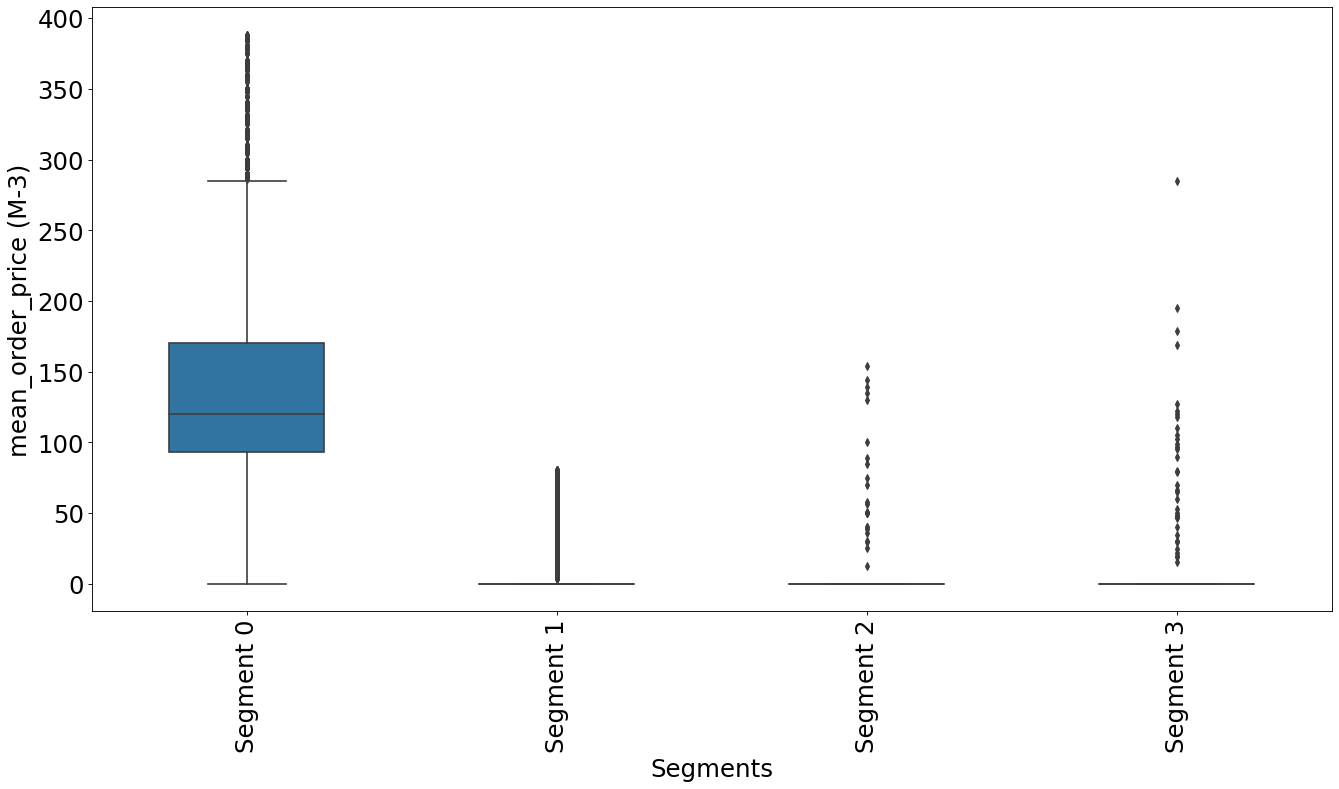

total_number_of_orders (M-6)


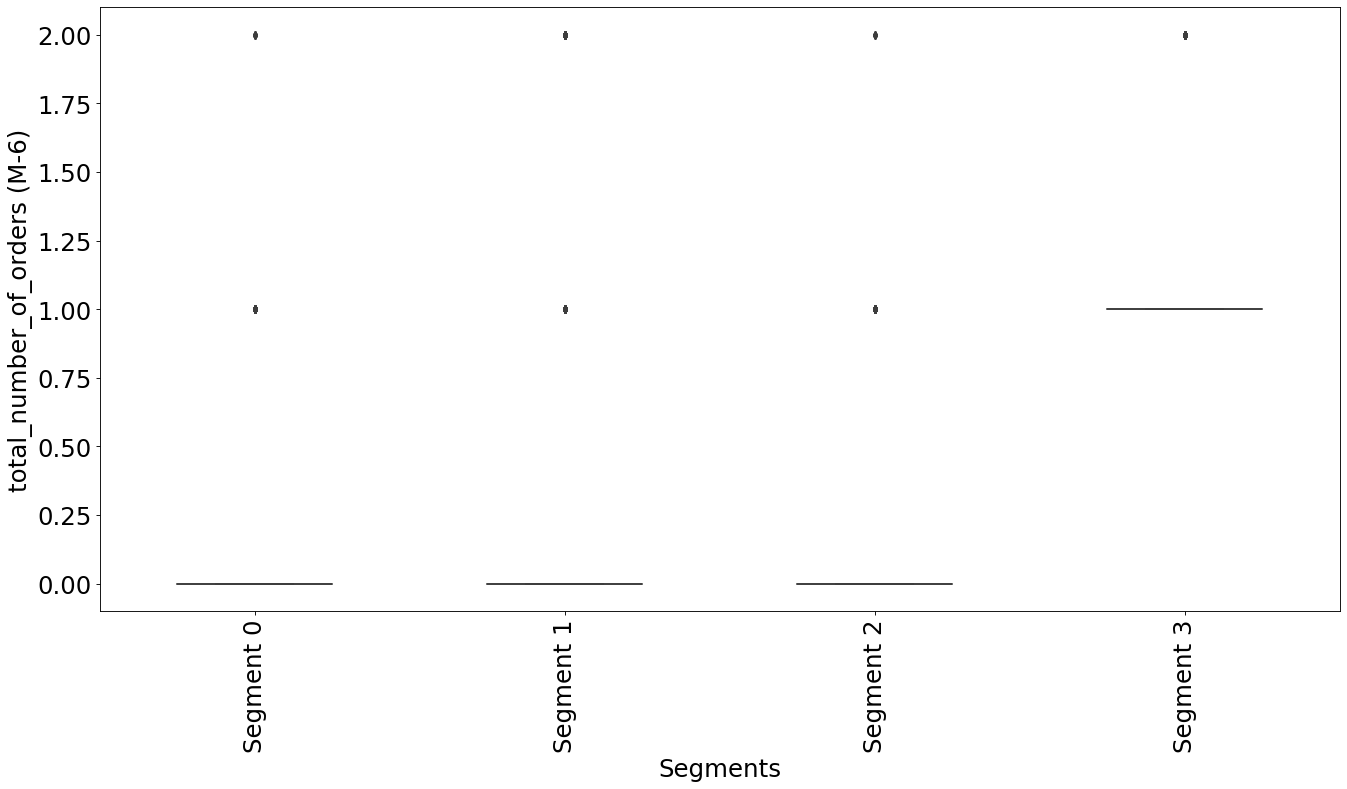

total_cost_of_orders (M-6)


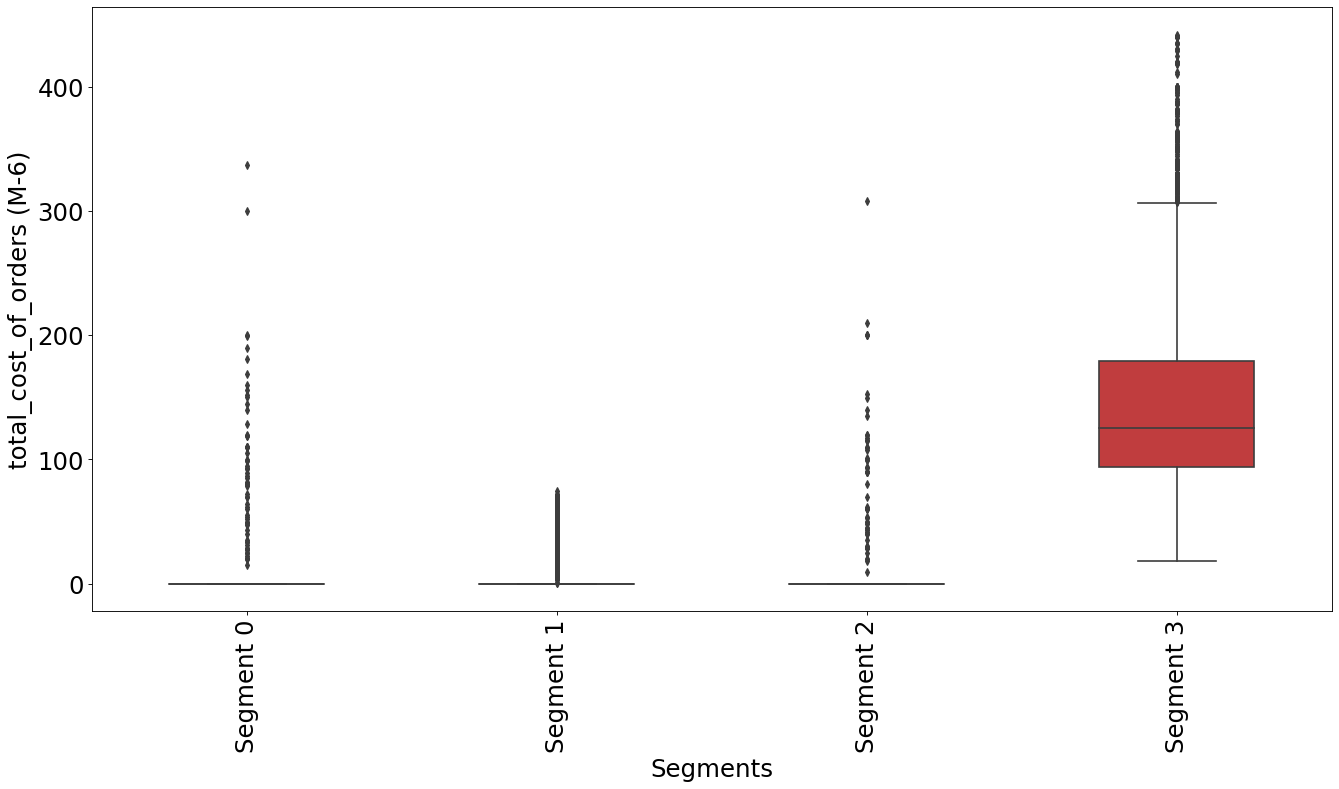

max_order_price (M-6)


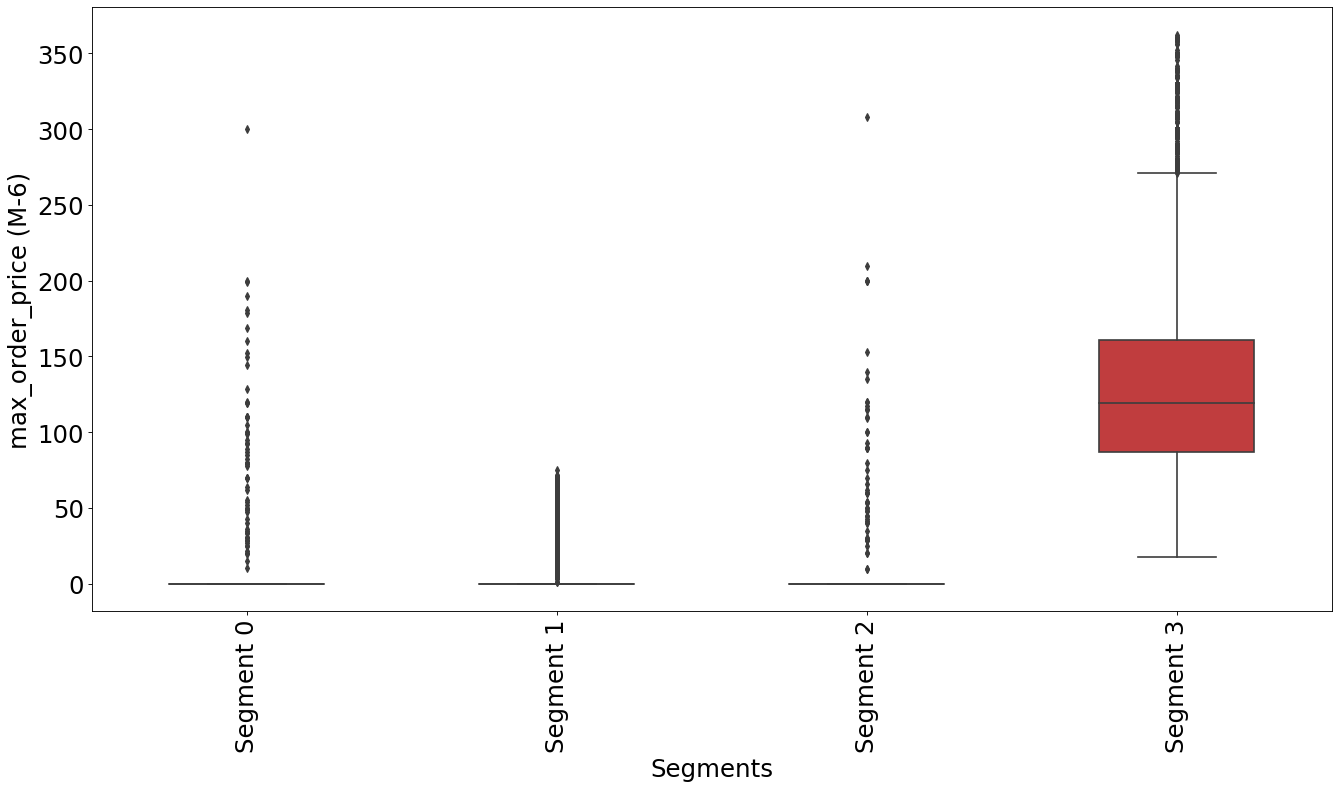

mean_order_price (M-6)


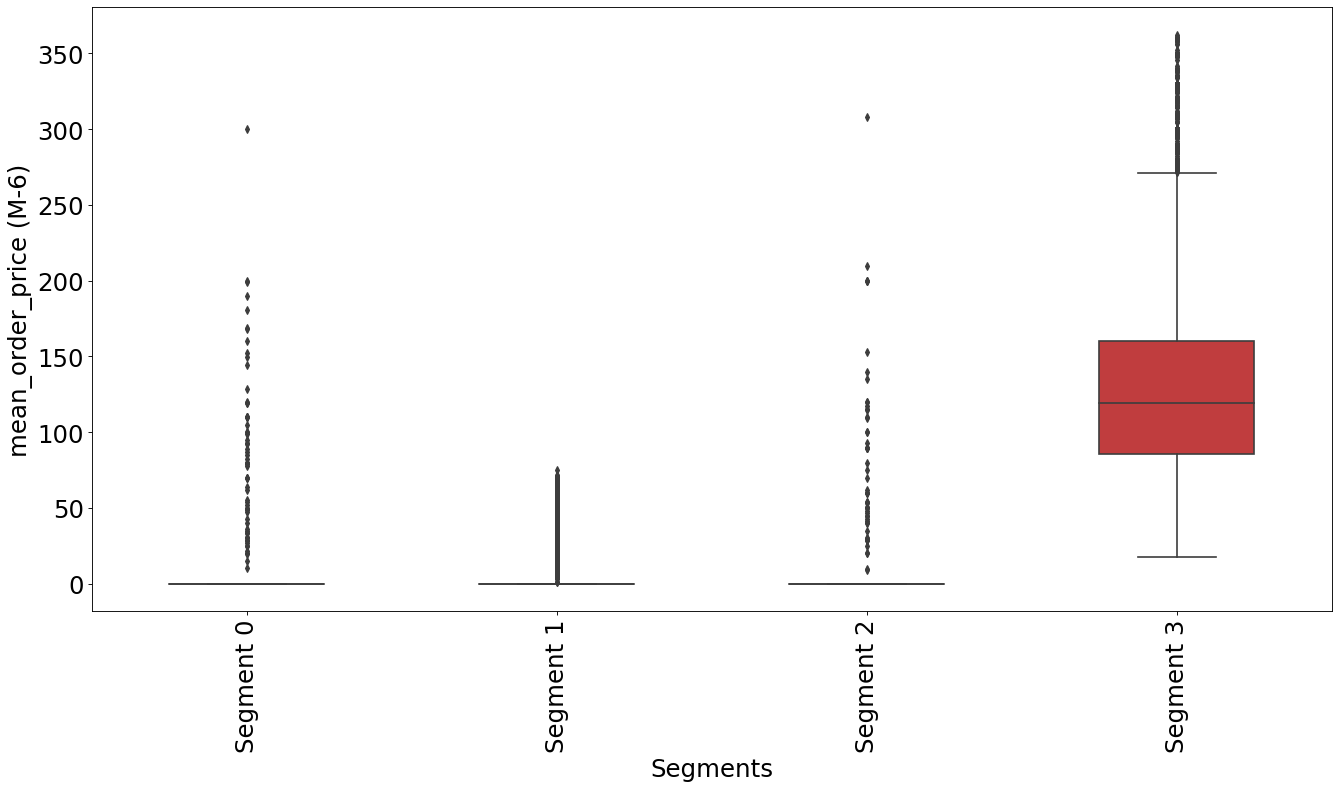

total_number_of_orders (M-9)


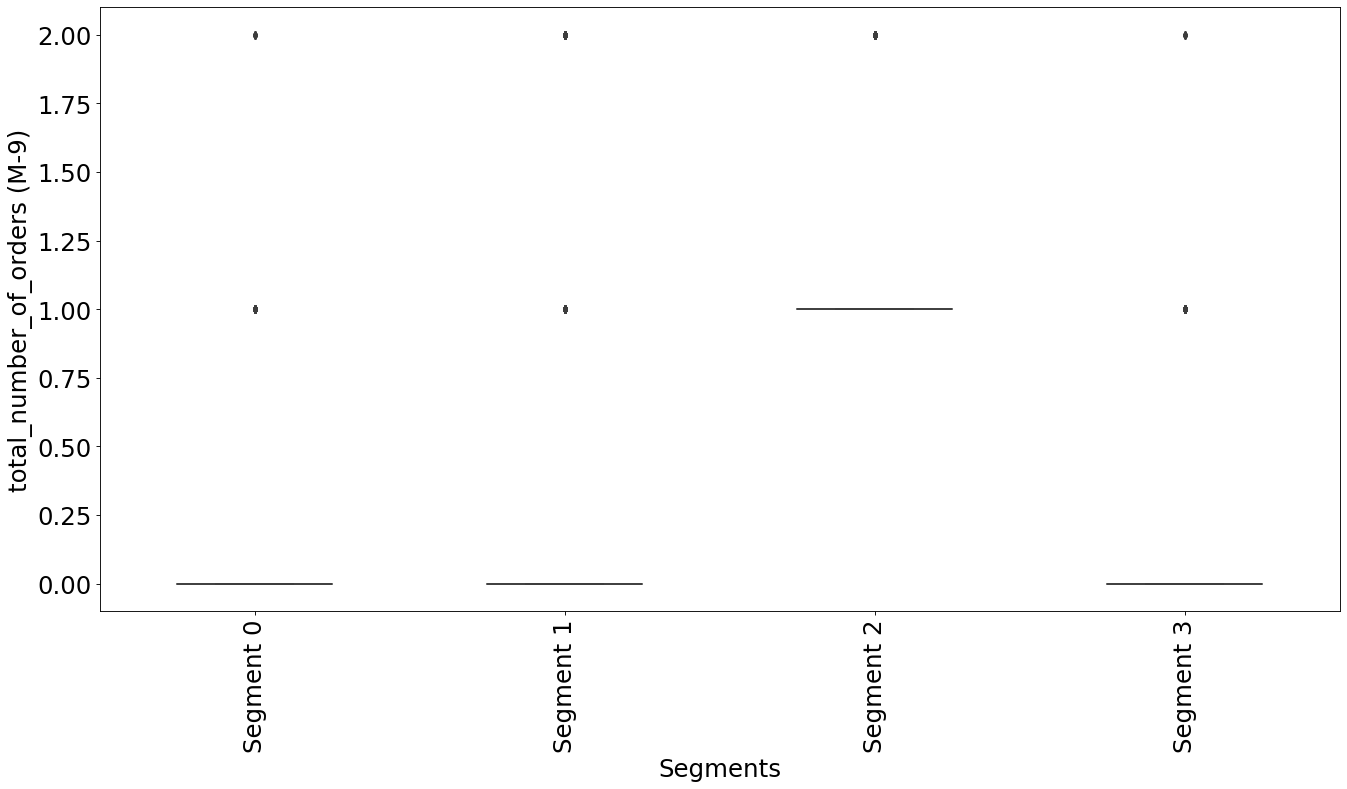

total_cost_of_orders (M-9)


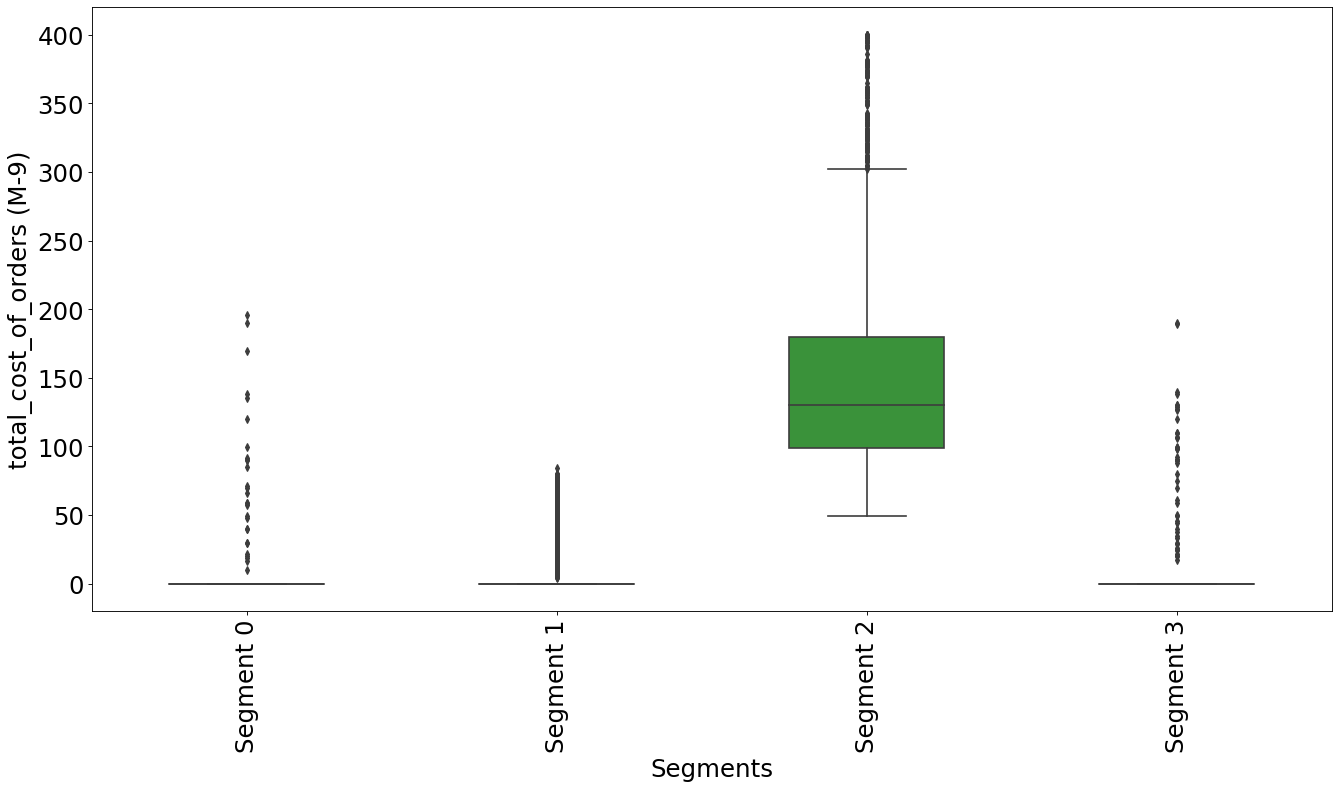

max_order_price (M-9)


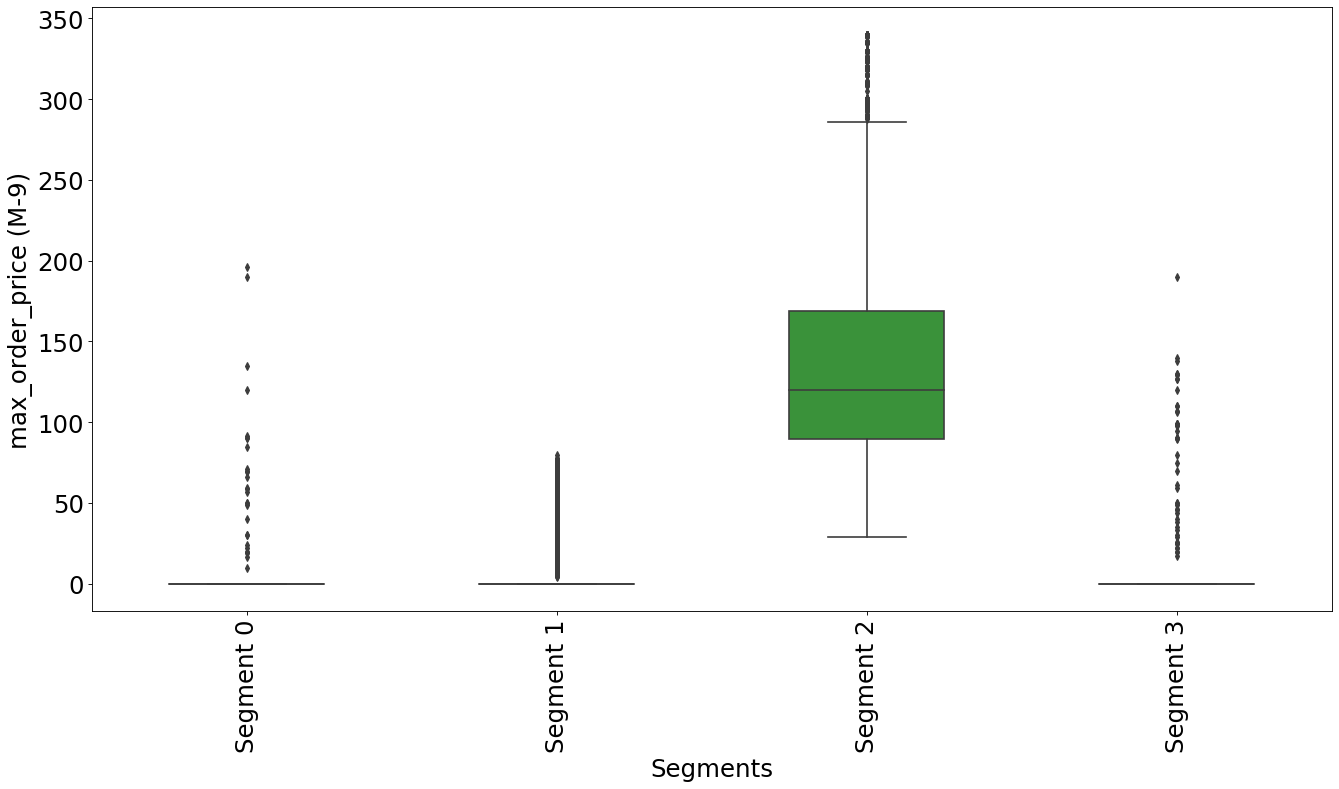

mean_order_price (M-9)


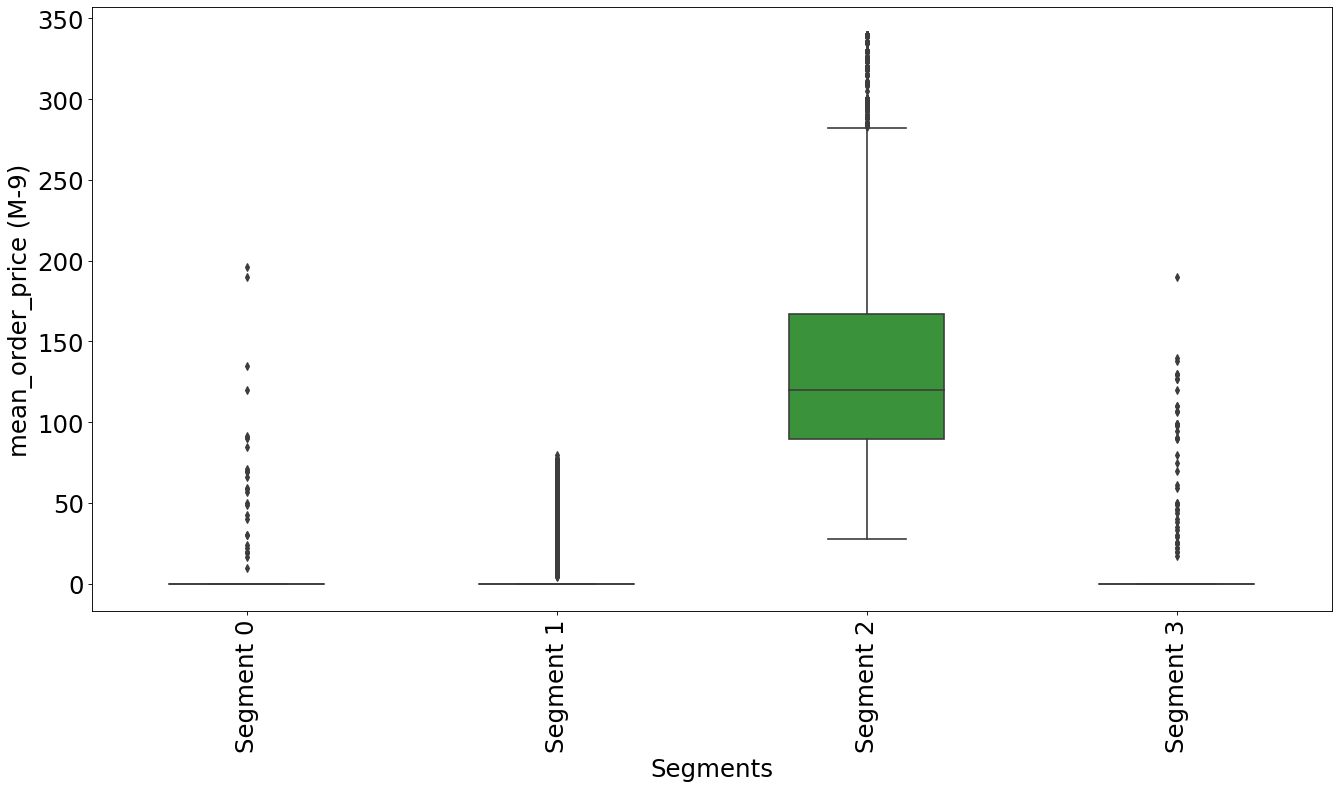

payment_installments


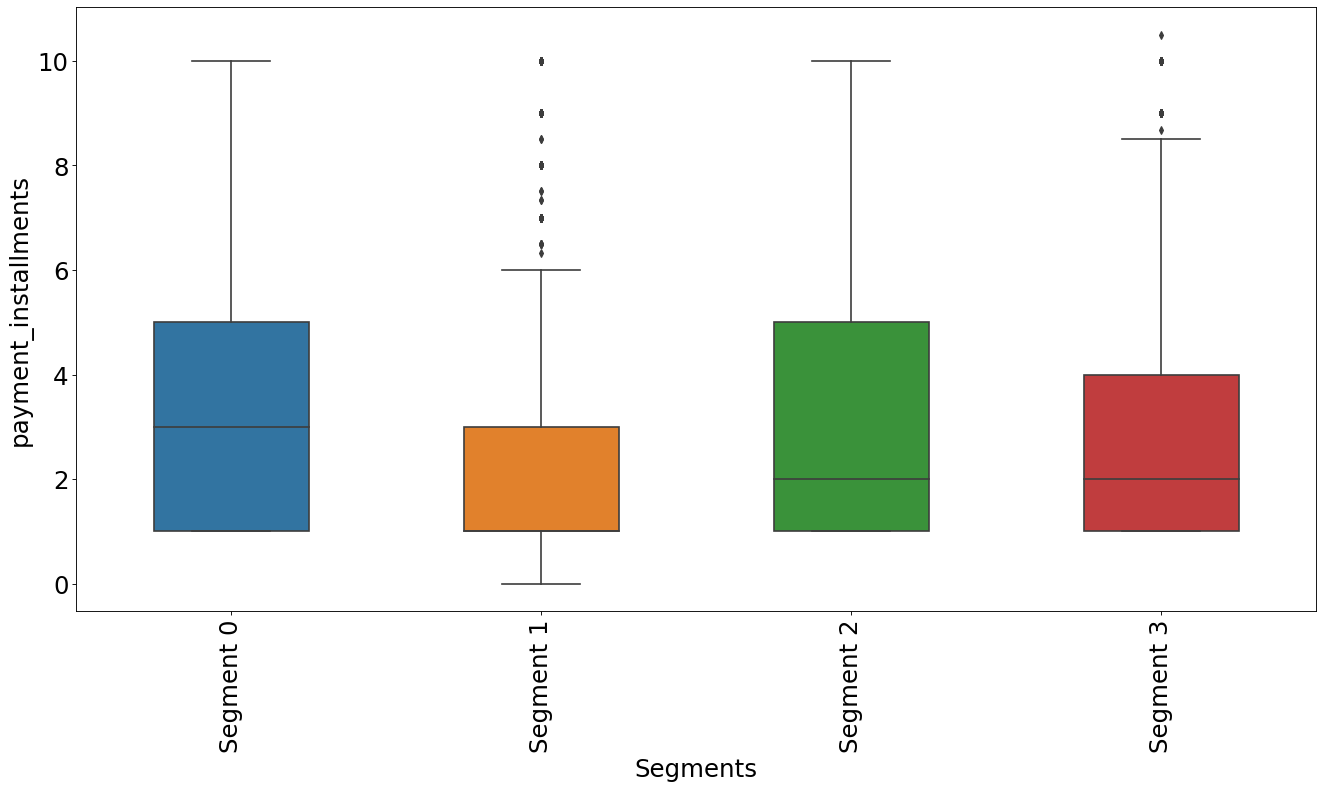

In [66]:
XX = newData.select_dtypes(['float64'])

colName = ['Segment '+str(i) for i in sampleSize.index]

dataframe = pd.DataFrame(np.nan,index = np.arange(sampleSize['max_order_price'].max()),columns=colName)
#print(dataframe.shape)

for cols in XX.columns:
    print(cols)
    
    for idx in range(0,dataframe.shape[1]):
        segment = sampleSize.index[idx]
        data0 = XX[newData['labels'] == segment]
        m = len(data0[cols])
        dataframe.iloc[0:m,idx] = data0[cols].values
        #print(segment)
        
    fig = plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
    
    ax = sns.boxplot(x="variable",y="value",data = pd.melt(dataframe),width=0.5)
    ax.set_xticklabels(dataframe.columns,rotation=90)

    plt.xlabel('Segments',fontsize=22)
    plt.ylabel(cols,fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    
    plt.show()
    
#dataframe.head(n=20)